In [1]:
import numpy as np
from netCDF4 import Dataset 
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as pl
import os
import urllib
import json

In [2]:
cor=pd.read_excel('confinement_index_code/confinement index 20April2020.xlsx',header=2,usecols='J:L',nrows=228)
cor

,Row,country code,Index scale
0,1,ALB,Albania
1,2,DZA,Algeria
2,3,AGO,Angola
3,4,ARG,Argentina
4,5,ARM,Armenia
...,...,...,...
223,224,cn63,Qinghai
224,225,cn64,Ningxia
225,226,cn65,Xinjiang
226,227,ciavi,international aviation


143 is first US state;  193 is last USstate, 194 inter aviation US, 195 inter shipping US, 196 first china , 225 last china 226, china aviation, 227 china shipping, 2228 EU, 229 world, 230 bunkers

In [3]:
nc = Dataset('confinement_index_code/co2_sectors.nc','r')
ncc = Dataset('confinement_index_code/confinement_vhigh.nc','r')
ncp=Dataset('confinement_index_code/param.nc','r')
#Look at the variables available
#nc.variables

#Look at the dimensions
#nc.dimensions

# sectors are  country fractions  of CO2 per sector and totals in Mt per day CO2
# emissions are timeseries of Co2 emissions for each country - not used
#confinement are levels of confinement per julian day 1-3 and sector
#params are percentage reductions per confinment level and sector low,med and high




In [4]:
#nc.variables

In [5]:
CO2= nc.variables['CO2'][:][0,:,0,0].data  # Mt per day for each country
ishi=nc.variables['ishi'][:][0,:,0,0].data
iavi=nc.variables['iavi'][:][0,:,0,0].data
navi=nc.variables['navi'][:][0,:,0,0].data
trsp=nc.variables['trsp'][:][0,:,0,0].data
res=nc.variables['res'][:][0,:,0,0].data
com=nc.variables['com'][:][0,:,0,0].data
ind=nc.variables['ind'][:][0,:,0,0].data
pwd=nc.variables['pwd'][:][0,:,0,0].data
level =ncc.variables['level'][:][:,:,0,0].data #julian data and country
dishi=ncp.variables['dishi'][:][0,0,:,:].data
diavi=ncp.variables['diavi'][:][0,0,:,:].data
dnavi=ncp.variables['dnavi'][:][0,0,:,:].data
dtrsp=ncp.variables['dtrsp'][:][0,0,:,:].data
dres=ncp.variables['dres'][:][0,0,:,:].data
dcom=ncp.variables['dcom'][:][0,0,:,:].data
dind=ncp.variables['dind'][:][0,0,:,:].data
dpwd=ncp.variables['dpwd'][:][0,0,:,:].data

In [6]:

ic=23
print (pwd[ic],ind[ic],com[ic],trsp[ic],iavi[ic],navi[ic],ishi[ic],res[ic])
print (pwd[ic]+ind[ic]+com[ic]+trsp[ic]+navi[ic]+res[ic],CO2[ic],ishi[ic],iavi[ic])
print (CO2[194])

13.48392 9.678643 0.93753237 2.233533 0.08272344 0.19302137 0.08272344 1.0478302
27.574482 27.57448 0.08272344 0.08272344
0.20337808


In [7]:
i=2 #picks mid range trend from Corinne's data 0 - low - 2 high
dishi=np.squeeze(dishi[:,i])
dpwd=np.squeeze(dpwd[:,i])
diavi=np.squeeze(diavi[:,i])
dnavi=np.squeeze(dnavi[:,i])
dtrsp=np.squeeze(dtrsp[:,i])
dres=np.squeeze(dres[:,i])
dcom=np.squeeze(dcom[:,i])
dind=np.squeeze(dind[:,i])
print (dpwd)


[ 0.   -0.15 -0.25]


In [8]:
#for i in range(228):
#    print (i,cor.iloc[i]['country code'],iavi[i])

In [9]:
base = np.empty([366,len(CO2)]) #daily baseline for each country
base[:,:]=0.0
covid = base.copy()
covid[:,:]=0.0
jday=np.arange(366)/366.0+2020.0
#jday=np.arange(366)
for i in range(366):
    for j in range(len(CO2)):
        base[i,j]=CO2[j]
        covid[i,j]=CO2[j]
        if level[i,j] == 1:
            covid[i,j]=base[i,j]+ishi[j]*dishi[0]+iavi[j]*diavi[0]+navi[j]*dnavi[0]+trsp[j]*dtrsp[0]+res[j]*dres[0]+com[j]*dcom[0]+ind[j]*dind[0]+pwd[j]*dpwd[0]
        if level[i,j] == 2:
            covid[i,j]=base[i,j]+ishi[j]*dishi[1]+iavi[j]*diavi[1]+navi[j]*dnavi[1]+trsp[j]*dtrsp[1]+res[j]*dres[1]+com[j]*dcom[1]+ind[j]*dind[1]+pwd[j]*dpwd[1]   
        if level[i,j] == 3:
             covid[i,j]=base[i,j]+ishi[j]*dishi[2]+iavi[j]*diavi[2]+navi[j]*dnavi[2]+trsp[j]*dtrsp[2]+res[j]*dres[2]+com[j]*dcom[2]+ind[j]*dind[2]+pwd[j]*dpwd[2]
#end loops

In [10]:
#power only
base = np.empty([366,len(CO2)]) #daily baseline for each country
base[:,:]=0.0
covid = base.copy()
covid[:,:]=0.0
jday=np.arange(366)/366.0+2020.0
#jday=np.arange(366)
for i in range(366):
    for j in range(len(CO2)):
        base[i,j]=CO2[j]
        covid[i,j]=CO2[j]
        if level[i,j] == 1:
            covid[i,j]=base[i,j]+pwd[j]*dpwd[0]
        if level[i,j] == 2:
            covid[i,j]=base[i,j]+pwd[j]*dpwd[1]   
        if level[i,j] == 3:
             covid[i,j]=base[i,j]+pwd[j]*dpwd[2]
#end loops

In [11]:
#aviatyion
base = np.empty([366,len(CO2)]) #daily baseline for each country
base[:,:]=0.0
covid = base.copy()
covid[:,:]=0.0
jday=np.arange(366)/366.0+2020.0
#jday=np.arange(366)
for i in range(366):
    for j in range(len(CO2)):
        base[i,j]=iavi[j]+navi[j]
        covid[i,j]=iavi[j]+navi[j]
#        print (j,iavi[j],navi[j])
        if level[i,j] == 1:
            covid[i,j]=iavi[j]*diavi[0]+navi[j]*dnavi[0]
        if level[i,j] == 2:
            covid[i,j]=iavi[j]*diavi[1]+navi[j]*dnavi[1]  
        if level[i,j] == 3:
             covid[i,j]=iavi[j]*diavi[2]+navi[j]*dnavi[2]
#end loops
base[:,49] =0.0 #srt gibralter to zero
covid[:,49]=0.0

In [12]:
iavi.shape

(228,)

In [13]:
#set new points for China and US as sum of states 196-227 for china
us= base[:,143:195].sum(axis=1) #143 to 195 include international shipping and aviation
base[:,135] =us[:]
print (base[0,135],us[0])
china= base[:,196:227].sum(axis=1) #196 to 227
print (base[0,23],china[0])
base[:,23] =china[:]
usc= covid[:,143:195].sum(axis=1) #143 to 195
covid[:,135] =usc[:]
chinac= covid[:,196:227].sum(axis=1) #196 to 227
print (covid[60,23],chinac[60])
covid[:,23] =chinac[:]
base[:,49] =0.0 #srt gibralter to zero
covid[:,49]=0.0

c_covid=covid.copy()
c_base=base.copy()

0.6788550164783373 0.6788550164783373
0.27574479579925537 0.46183687436860055
0.27574479579925537 -0.33492290874710307


In [14]:

ic=135
print (pwd[ic],ind[ic],com[ic],trsp[ic],iavi[ic],navi[ic],ishi[ic],res[ic])
print (pwd[ic]+ind[ic]+com[ic]+trsp[ic]+navi[ic]+res[ic],CO2[ic],ishi[ic],iavi[ic])

6.3808203 1.4542334 0.8013123 4.793035 0.22258675 0.5342082 0.22258675 0.890347
14.853956 14.839117 0.22258675 0.22258675


0.6788550164783373 0.6788550164783373
0.27574479579925537 0.46183687436860055
0.0 -0.33492290874710307


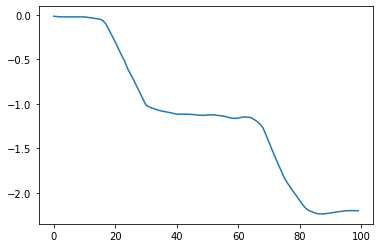

In [15]:
def moving_average(a, n=7) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

#power only
base = np.empty([366,len(CO2)]) #daily baseline for each country
base[:,:]=0.0
covid = base.copy()
covid[:,:]=0.0
jday=np.arange(366)/366.0+2020.0
#jday=np.arange(366)
for i in range(366):
    for j in range(len(CO2)):
        base[i,j]=iavi[j]+navi[j]
        covid[i,j]=0
        if level[i,j] == 1:
            covid[i,j]=iavi[j]*diavi[0]+navi[j]*dnavi[0]
        if level[i,j] == 2:
            covid[i,j]=iavi[j]*diavi[1] +navi[j]*dnavi[1]  
        if level[i,j] == 3:
             covid[i,j]=iavi[j]*diavi[2]+navi[j]*dnavi[2]
#        print (i,j,pwd[j],level[i,j],covid[i,j])
#end loops
#set new points for China and US as sum of states 196-227 for china
us= base[:,143:195].sum(axis=1) #143 to 195 include international shipping and aviation
base[:,135] =us[:]
print (base[0,135],us[0])
china= base[:,196:227].sum(axis=1) #196 to 227
print (base[0,23],china[0])
base[:,23] =china[:]
usc= covid[:,143:195].sum(axis=1) #143 to 195
covid[:,135] =usc[:]
chinac= covid[:,196:227].sum(axis=1) #196 to 227
print (covid[60,23],chinac[60])
covid[:,23] =chinac[:]
base[:,49] =0.0 #srt gibralter to zero
covid[:,49]=0.0


y=moving_average(np.squeeze((covid[:,:142].sum(axis=1))))
yc=np.squeeze(base[:,:142].sum(axis=1))
pl.plot(y[0:100])

In [16]:
#read in google mobiltity data
gog=pd.read_csv('Global_Mobility_Report290720.csv')

/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
#for col in gog.columns:
#    print ('column', col,':', type(gog[col][0]))
gog['sub_region_1'] = gog['sub_region_1'].fillna('None')
gog['sub_region_2'] = gog['sub_region_2'].fillna('None')
#gog.fillna(0)
#print (gog.iloc[234])
#select country level data only

gog.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'retail'}, inplace = True)
gog.rename(columns={'grocery_and_pharmacy_percent_change_from_baseline': 'grocery'}, inplace = True)
gog.rename(columns={'parks_percent_change_from_baseline': 'parks'}, inplace = True)
gog.rename(columns={'transit_stations_percent_change_from_baseline': 'transit'}, inplace = True)
gog.rename(columns={'workplaces_percent_change_from_baseline': 'work'}, inplace = True)
gog.rename(columns={'residential_percent_change_from_baseline': 'residential'}, inplace = True)
gog.rename(columns={'country_region': 'country'}, inplace = True)
from datetime import datetime
jday=np.zeros(len(gog['date']))
for i in range(len(gog['date'])):
    jday[i]=datetime.strptime(gog['date'].values[i],"%Y-%m-%d").timetuple().tm_yday
gog['jday'] = jday
gogc=gog.copy().loc[gog['sub_region_1']== 'None'].drop(['sub_region_1','sub_region_2','date','country_region_code','iso_3166_2_code','census_fips_code'],axis=1)
gogc

,country,metro_area,retail,grocery,parks,transit,work,residential,jday
0,United Arab Emirates,NaN,0.0,4.0,5.0,0.0,2.0,1.0,46.0
1,United Arab Emirates,NaN,1.0,4.0,4.0,1.0,2.0,1.0,47.0
2,United Arab Emirates,NaN,-1.0,1.0,5.0,1.0,2.0,1.0,48.0
3,United Arab Emirates,NaN,-2.0,1.0,5.0,0.0,2.0,1.0,49.0
4,United Arab Emirates,NaN,-2.0,0.0,4.0,-1.0,2.0,1.0,50.0
...,...,...,...,...,...,...,...,...,...
1362904,Zimbabwe,NaN,-22.0,-12.0,-12.0,-36.0,-19.0,28.0,205.0
1362905,Zimbabwe,NaN,-30.0,-18.0,-23.0,-47.0,-19.0,30.0,206.0
1362906,Zimbabwe,NaN,-21.0,-4.0,-6.0,-37.0,-2.0,22.0,207.0
1362907,Zimbabwe,NaN,-24.0,-11.0,-9.0,-45.0,6.0,22.0,208.0


In [18]:
#do a direct comparison with apple data 14/1 -21/4 walking,cars,transit
#read in google mobiltity data
#google jan 3rd to Feb 6 baseline
#apple compared to a baseline volume on 13 January 2020. 
#apple starts 13 Jan, so take first 25days and average to make compsarable to Google

apple=pd.read_csv('applemobilitytrends-2020-07-03.csv')
apple=apple.iloc[:153]
# baseline, julian day, google csv
#type(apple['region'])
#apple.region
js=np.arange(173)+12
lis=apple.columns
js =js.astype(str)
col=['geo_type', 'region', 'transportation_type','alt','sub','coun']+js.tolist()
print (lis)
print (col)
apple.columns=col
#apple.region
#apple.columns
c=apple.iloc[:,6:29].mean(axis=1)
print(type(c))
apple[js.tolist()]=-100*(1-apple[js.tolist()].divide(c,axis=0))
#apple.sub(c,axis=1)
#apple['12']
apple.region.unique()



Index(['geo_type', 'region', 'transportation_type', 'alternative_name',
       'sub-region', 'country', '2020-01-13', '2020-01-14', '2020-01-15',
       '2020-01-16',
       ...
       '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
       '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03'],
      dtype='object', length=179)
['geo_type', 'region', 'transportation_type', 'alt', 'sub', 'coun', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '1

array(['Albania', 'Argentina', 'Australia', 'Austria', 'Belgium',
       'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'Colombia',
       'Croatia', 'Czech Republic', 'Denmark', 'Egypt', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macao', 'Malaysia',
       'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Norway',
       'Philippines', 'Poland', 'Portugal', 'Republic of Korea',
       'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Singapore',
       'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Vietnam'], dtype=object)

In [19]:
len(apple.region.unique())

63

In [20]:
apple[js.tolist()].shape

(153, 173)

In [21]:
len(gogc.country.unique())

135

In [22]:
gogu1=gog.loc[gog['country'] == 'United States'].loc[gog['sub_region_1'] != 'None'].drop(['date',
                                                                                     'country_region_code'],axis=1)
gogu=gogu1.copy().loc[gog['sub_region_2'] == 'None']
gogu.loc[gogu.index[gogu['country']=='United States'],'country'] ='USA'
gogu.loc[gogu.index[gogu['country']=='Taiwan'],'country'] ='Tapei'
gogu.loc[gogu.index[gogu['country']=='Myanmar (Burma)'],'country'] ='Myanmar'
gogu.loc[gogu.index[gogu['country']=='Czechia'],'country'] ='Czech Republic' 
gogu.loc[gogu.index[gogu['country']=='Russia'],'country'] ='Russian Federation'


In [23]:
#gogc=gog.copy().loc[gog['sub_region_1'] == 'None']
gogc.loc[gogc.index[gogc['country']=='United States'],'country'] ='USA'
gogc.loc[gogc.index[gogc['country']=='Taiwan'],'country'] ='Tapei'
gogc.loc[gogc.index[gogc['country']=='Myanmar (Burma)'],'country'] ='Myanmar'
gogc.loc[gogc.index[gogc['country']=='Czechia'],'country'] ='Czech Republic'
gogc.loc[gogc.index[gogc['country']=='Russia'],'country'] ='Russian Federation'
gogc.loc[gogc.index[gogc['country']=='Serbia'],'country'] ='Serbia-blank'

In [24]:
gogc.country.unique()

array(['United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda',
       'Angola', 'Argentina', 'Austria', 'Australia', 'Aruba',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Benin', 'Bolivia',
       'Brazil', 'The Bahamas', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Switzerland', "Côte d'Ivoire", 'Chile', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cape Verde', 'Czech Republic', 'Germany', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Estonia', 'Egypt', 'Spain',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Hong Kong',
       'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Ireland',
       'Israel', 'India', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait',
       'Kazakhstan', 'Laos', 'Lebanon', 'Liechtenstein', 'Sri Lanka',
       'Lithua

In [25]:
print (type(gogc.country.unique()))
for c in gogc.country.unique():
    if np.where(cor['Index scale'].values[:] == c)[0].size ==0:
        print (c, ' not found')
        indd=gogc.index[gogc['country']==c]
        gogc.drop(indd, inplace=True)
#    print (c, indd[0],np.where(cor['Index scale'].values[:] == c)[0])
#for c in gogc.country.unique():
  #  print (c, gogc.index[gogc['country']==c])

<class 'numpy.ndarray'>
Afghanistan  not found
Antigua and Barbuda  not found
Aruba  not found
Barbados  not found
Burkina Faso  not found
The Bahamas  not found
Belize  not found
Cape Verde  not found
Fiji  not found
Guinea-Bissau  not found
Laos  not found
Liechtenstein  not found
Mali  not found
Papua New Guinea  not found
Puerto Rico  not found
Réunion  not found
Serbia-blank  not found
Rwanda  not found
Uganda  not found


In [26]:
apple.loc[apple['region']=='UK','region'] ='United Kingdom'
apple.loc[apple['region']=='United States','region'] ='USA'
js =(np.arange(34)+12).astype(str)
a1=apple.copy().drop('geo_type',axis=1).drop(js,axis=1).drop('alt',axis=1).drop('sub',axis=1).drop('coun',axis=1)

In [27]:
a1

,region,transportation_type,46,47,48,49,50,51,52,53,...,175,176,177,178,179,180,181,182,183,184
0,Albania,driving,32.088526,4.356161,-10.086715,-10.005059,-3.564455,2.702631,13.317890,15.849221,...,15.614460,18.196826,36.140697,58.943089,65.291831,33.354191,27.485178,35.640555,41.958675,63.658714
1,Albania,walking,-7.649040,5.582977,-4.524055,-10.959776,-4.709806,2.184829,3.255628,-18.269619,...,13.504706,14.761256,23.753783,17.416400,12.805408,59.538141,21.797935,18.443493,30.375255,37.411935
2,Argentina,driving,-13.224996,-9.210915,-3.435753,-2.638840,3.018261,30.428143,39.469666,6.461714,...,-52.657447,-50.207677,-43.104326,-47.285661,-71.035645,-54.507073,-51.024267,-57.251997,-53.975797,-43.881562
3,Argentina,walking,-29.288688,-4.429242,14.056773,9.483863,13.923780,26.987777,23.212824,2.813757,...,-65.125165,-63.048429,-58.997260,-62.291392,-77.554887,-68.051009,-67.181440,-68.838736,-65.841280,-59.467850
4,Australia,driving,-1.970386,1.541004,5.122222,7.027550,13.092677,17.960740,-2.638747,-2.738502,...,-2.469163,6.039972,9.481532,-9.462015,-4.982998,-2.908086,1.191860,2.548533,10.359380,11.656200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,USA,walking,10.478150,2.172808,-4.754645,-1.922847,0.965968,29.626049,54.371026,0.832931,...,10.630193,15.638105,31.212996,30.433777,-1.666274,7.171218,9.613406,12.663766,20.864579,29.502514
149,Uruguay,driving,-5.213206,-2.060582,-5.015517,0.603020,3.755643,27.478354,45.665765,6.585721,...,-41.452767,-32.702417,-16.866467,-20.976323,-51.201969,-39.163734,-43.117519,-36.375275,-32.275824,-2.705674
150,Uruguay,walking,-26.064715,-3.856282,7.155109,7.445188,19.338419,19.396434,14.801586,11.030562,...,-51.800507,-38.178406,-26.784111,-39.211087,-65.677876,-41.508511,-55.235040,-41.137210,-38.967420,-19.265268
151,Vietnam,driving,-10.537883,-14.756068,-15.078532,-14.564332,-12.925863,-4.672515,1.166708,-8.385214,...,-16.429397,-11.235104,4.539512,13.228624,-5.544040,-13.013016,-12.559823,-11.025937,-9.744795,4.278055


In [28]:
#addcolumn
#a1['165']=0

a2=a1

In [29]:
a2.shape

(153, 141)

In [32]:
for c in apple.region.unique():
    g=gogc.loc[gogc['country'] == c]
    if g.empty:
        print ('empty',c)
    else:
        gt=pd.DataFrame([pd.Series([c,'google_transit']).append(pd.Series(g.transit.values),
                                                        ignore_index=True).append(pd.Series(np.zeros(5)),
                                                       ignore_index=True)])
# don't both updating apple so just cut data off 1 August 2020 change to make updating easier
        gt.drop(gt.columns[141:], axis=1, inplace=True)
        print (c,len(gt.columns),len(a1.columns))
        gt.columns = a1.columns
        ind1=a1.index[a1.region == c]
#        print(c,ind[-1])
        a1=pd.concat([a1.copy()[:ind1[-1]+1],gt,a1.copy()[ind1[-1]+1:]],ignore_index=True)
        
#a2=apple.copy()
#ind
#ap
#a_row = pd.Series([1, 2])

empty Albania
Argentina 141 141
Australia 141 141
Austria 141 141
Belgium 141 141
Brazil 141 141
Bulgaria 141 141
Cambodia 141 141
Canada 141 141
Chile 141 141
Colombia 141 141
Croatia 141 141
Czech Republic 141 141
Denmark 141 141
Egypt 141 141
Estonia 141 141
Finland 141 141
France 141 141
Germany 141 141
Greece 141 141
Hong Kong 141 141
Hungary 141 141
empty Iceland
India 141 141
Indonesia 141 141
Ireland 141 141
Israel 141 141
Italy 141 141
Japan 141 141
Latvia 141 141
Lithuania 141 141
Luxembourg 141 141
empty Macao
Malaysia 141 141
Mexico 141 141
Morocco 141 141
Netherlands 141 141
New Zealand 141 141
Norway 141 141
Philippines 141 141
Poland 141 141
Portugal 141 141
empty Republic of Korea
Romania 141 141
empty Russia
Saudi Arabia 141 141
empty Serbia
Singapore 141 141
Slovakia 141 141
Slovenia 141 141
South Africa 141 141
Spain 141 141
Sweden 141 141
Switzerland 141 141
empty Taiwan
Thailand 141 141
Turkey 141 141
Ukraine 141 141
United Arab Emirates 141 141
United Kingdom 141 

In [33]:
gt.columns.shape

(141,)

In [34]:
#a1.to_csv('AppleGoogle.csv',index=False)
#put mean april data into the apple sheet
js=np.arange(30)+90
js=js.astype(str).tolist()
a1['mean']=a1[js].mean(axis=1)
#a1=a1.drop(['mean21'],axis=1,inplace=True)


In [35]:
a1[a1['mean']<-70]

,region,transportation_type,46,47,48,49,50,51,52,53,...,176,177,178,179,180,181,182,183,184,mean
0,Albania,driving,32.088526,4.356161,-10.086715,-10.005059,-3.564455,2.702631,13.317890,15.849221,...,18.196826,36.140697,58.943089,65.291831,33.354191,27.485178,35.640555,41.958675,63.658714,-70.985299
2,Argentina,driving,-13.224996,-9.210915,-3.435753,-2.638840,3.018261,30.428143,39.469666,6.461714,...,-50.207677,-43.104326,-47.285661,-71.035645,-54.507073,-51.024267,-57.251997,-53.975797,-43.881562,-79.007074
3,Argentina,walking,-29.288688,-4.429242,14.056773,9.483863,13.923780,26.987777,23.212824,2.813757,...,-63.048429,-58.997260,-62.291392,-77.554887,-68.051009,-67.181440,-68.838736,-65.841280,-59.467850,-83.880917
6,Australia,transit,9.928985,11.668941,16.255182,15.189082,16.918980,21.374473,4.950499,15.983628,...,-44.774011,-42.450718,-51.663431,-46.886096,-46.332931,-44.864529,-44.784069,-42.953595,-43.456473,-79.247929
13,Belgium,transit,9.773416,19.490244,24.384317,26.425742,23.118455,22.824275,13.205507,5.601420,...,-15.650799,-18.289497,-26.722634,-24.378115,-12.602033,-8.376549,-9.285831,-7.841678,-12.584203,-77.160996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Turkey,walking,1.883800,-3.027102,-1.468500,-1.329184,-6.440353,9.833540,33.717589,10.965485,...,-9.357290,12.576331,-29.262115,-42.688730,-3.401515,-4.585704,-4.159048,-4.228706,-1.929986,-74.689990
194,United Arab Emirates,google_transit,0.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,-2.000000,...,-48.000000,-47.000000,-54.000000,-48.000000,-47.000000,-46.000000,-47.000000,-47.000000,-47.000000,-76.166667
196,United Kingdom,transit,1.569840,10.503838,9.948356,12.883152,9.994646,17.169619,17.484392,-2.364823,...,-55.626265,-57.616742,-60.986664,-61.940241,-58.922124,-59.320219,-58.801769,-59.385025,-57.061260,-85.247947
200,USA,transit,-6.804312,3.468267,6.427990,6.956876,7.973963,19.141579,12.540683,-11.238812,...,-49.318552,-46.297803,-50.915378,-55.471928,-48.860862,-49.399919,-48.738812,-45.677380,-48.270952,-75.280038


In [36]:
a1[a1.region=='United Kingdom'].to_csv('UK.csv')

In [37]:
#import matplotlib.pyplot as plt
#fig, ax = pl.subplots(20,4, figsize=(40/2.54, 150/2.54))
#i =0
#j=0
#google jan 3rd to Feb 6 baseline
#apple compared to a baseline volume on 13 January 2020. 
#apple starts 13 Jan, so take first 25days and average to make compsarable to Google
t=0
w=0
d=0
gtt=0
gtw=0
gtd=0
countt=0
countd=0
countw=0
countw=0
weights=np.zeros(60)



gtm=np.zeros(60)
adm=np.zeros(60)
ctm=np.zeros(60)

for c in a1.region.unique():
    a1s=a1.copy().loc[a1.region == c]

    sg=sum(a1s.transportation_type =='google_transit')
    st=sum(a1s.transportation_type =='transit')
    sw=sum(a1s.transportation_type =='walking')
    sd=sum(a1s.transportation_type =='driving')
    if sg >0 and st >0:
        gtt=gtt+a1s.loc[a1s.transportation_type =='google_transit']['mean'].values[0]
        t=t+a1s.loc[a1s.transportation_type =='transit']['mean'].values[0]
        countt=countt+1
    if sg >0 and sw >0:
        gtw=gtw+a1s.loc[a1s.transportation_type =='google_transit']['mean'].values[0]
        w=w+a1s.loc[a1s.transportation_type =='walking']['mean'].values[0]
        countw=countw+1
    if sg >0 and sd >0:
#        print (c,a1s.loc[a1s.transportation_type =='driving']['mean'].values[0])
        weights[countd] =trsp[cor.index[cor['Index scale']==c][0]]
        gtd=gtd+a1s.loc[a1s.transportation_type =='google_transit']['mean'].values[0]
        d=d+a1s.loc[a1s.transportation_type =='driving']['mean'].values[0]
        gtm[countd]=a1s.loc[a1s.transportation_type =='google_transit']['mean'].values[0]
        adm[countd]=a1s.loc[a1s.transportation_type =='driving']['mean'].values[0]
#        ctm[countd]=dtrsp[cor.index[cor['Index scale']==c][0]]
        countd=countd+1
#        ws=ws+weight
    print (countd,countw,countt)
        
print,('google, apple, count')
print ('transit ', gtt/countt,t/countt,countt)
print ('walking ', gtw/countw,w/countw,countw)
print ('driving ', gtd/countd,d/countd,countd)

#    print (c,
    
#    ax[j,i].bar(a1s['transportation_type'],a1s['mean'])
#    ax[j,i].set_title=c
#    i=i+1
#    if i==4:
#        i=0
#        j=j+1
    #endif



0 0 0
1 1 0
2 2 1
3 3 1
4 4 2
5 5 3
6 6 3
7 7 3
8 8 4
9 9 4
10 10 4
11 11 4
12 12 5
13 13 6
14 14 6
15 15 7
16 16 8
17 17 9
18 18 10
19 19 10
20 20 10
21 21 10
21 21 10
22 22 10
23 23 10
24 24 11
25 25 11
26 26 12
27 27 13
28 28 13
29 29 13
30 30 14
30 30 14
31 31 14
32 32 15
33 33 15
34 34 16
35 35 17
36 36 18
37 37 19
38 38 19
39 39 19
39 39 19
40 40 19
40 40 19
41 41 19
41 41 19
42 42 20
43 43 21
44 44 21
45 45 21
46 46 22
47 47 23
48 48 24
48 48 24
49 49 24
50 50 24
51 51 24
52 52 24
53 53 25
54 54 26
55 55 26
56 56 26
transit  -60.178205128205136 -73.42186290076046 26
walking  -61.1154761904762 -62.070560527868885 56
driving  -61.1154761904762 -57.06647051270502 56


In [38]:
a1.at[a1.region=='Russia','region']='Russian Federation'
a1.at[a1.region=='Taiwan','region']='Tapei'
a1.at[a1.region=='Republic of Korea','region']='South Korea'


In [39]:
a1=a1[a1.region!='Macao'].copy()

In [40]:
t=0
w=0
d=0
gtt=0
gtw=0
gtd=0
countt=0
countd=0
countw=0
ws=0

gtm=np.zeros(58)
adm=np.zeros(58)

for c in a1.region.unique():
    a1s=a1.copy().loc[a1.region == c]
#    print (c,'found ',trsp[cor.index[cor['Index scale']==c][0]])
    weight =trsp[cor.index[cor['Index scale']==c][0]]
    sg=sum(a1s.transportation_type =='google_transit')
    st=sum(a1s.transportation_type =='transit')
    sw=sum(a1s.transportation_type =='walking')
    sd=sum(a1s.transportation_type =='driving')
    if sg >0 and st >0:
        gtt=gtt+a1s.loc[a1s.transportation_type =='google_transit']['mean'].values[0]
        t=t+a1s.loc[a1s.transportation_type =='transit']['mean'].values[0]
        countt=countt+1
    if sg >0 and sw >0:
        gtw=gtw+a1s.loc[a1s.transportation_type =='google_transit']['mean'].values[0]
        w=w+a1s.loc[a1s.transportation_type =='walking']['mean'].values[0]
        countw=countw+1
    if sg >0 and sd >0:
#        print (countd,c)
        gtd=gtd+a1s.loc[a1s.transportation_type =='google_transit']['mean'].values[0]
        d=d+a1s.loc[a1s.transportation_type =='driving']['mean'].values[0]
        gtm[countd]=a1s.loc[a1s.transportation_type =='google_transit']['mean'].values[0]
        adm[countd]=a1s.loc[a1s.transportation_type =='driving']['mean'].values[0]
        countd=countd+1
        ws=ws+weight
        
print,('google, apple, count')
print ('transit ', gtt/countt,t/countt,countt)
print ('walking ', gtw/countw,w/countw,countw)
print ('driving ', gtd/countd,d/countd,countd)

#    print (c,
    
#    ax[j,i].bar(a1s['transportation_type'],a1s['mean'])
#    ax[j,i].set_title=c
#    i=i+1
#    if i==4:
#        i=0
#        j=j+1
    #endif
    
    

transit  -60.178205128205136 -73.42186290076046 26
walking  -61.1154761904762 -62.070560527868885 56
driving  -61.1154761904762 -57.06647051270502 56


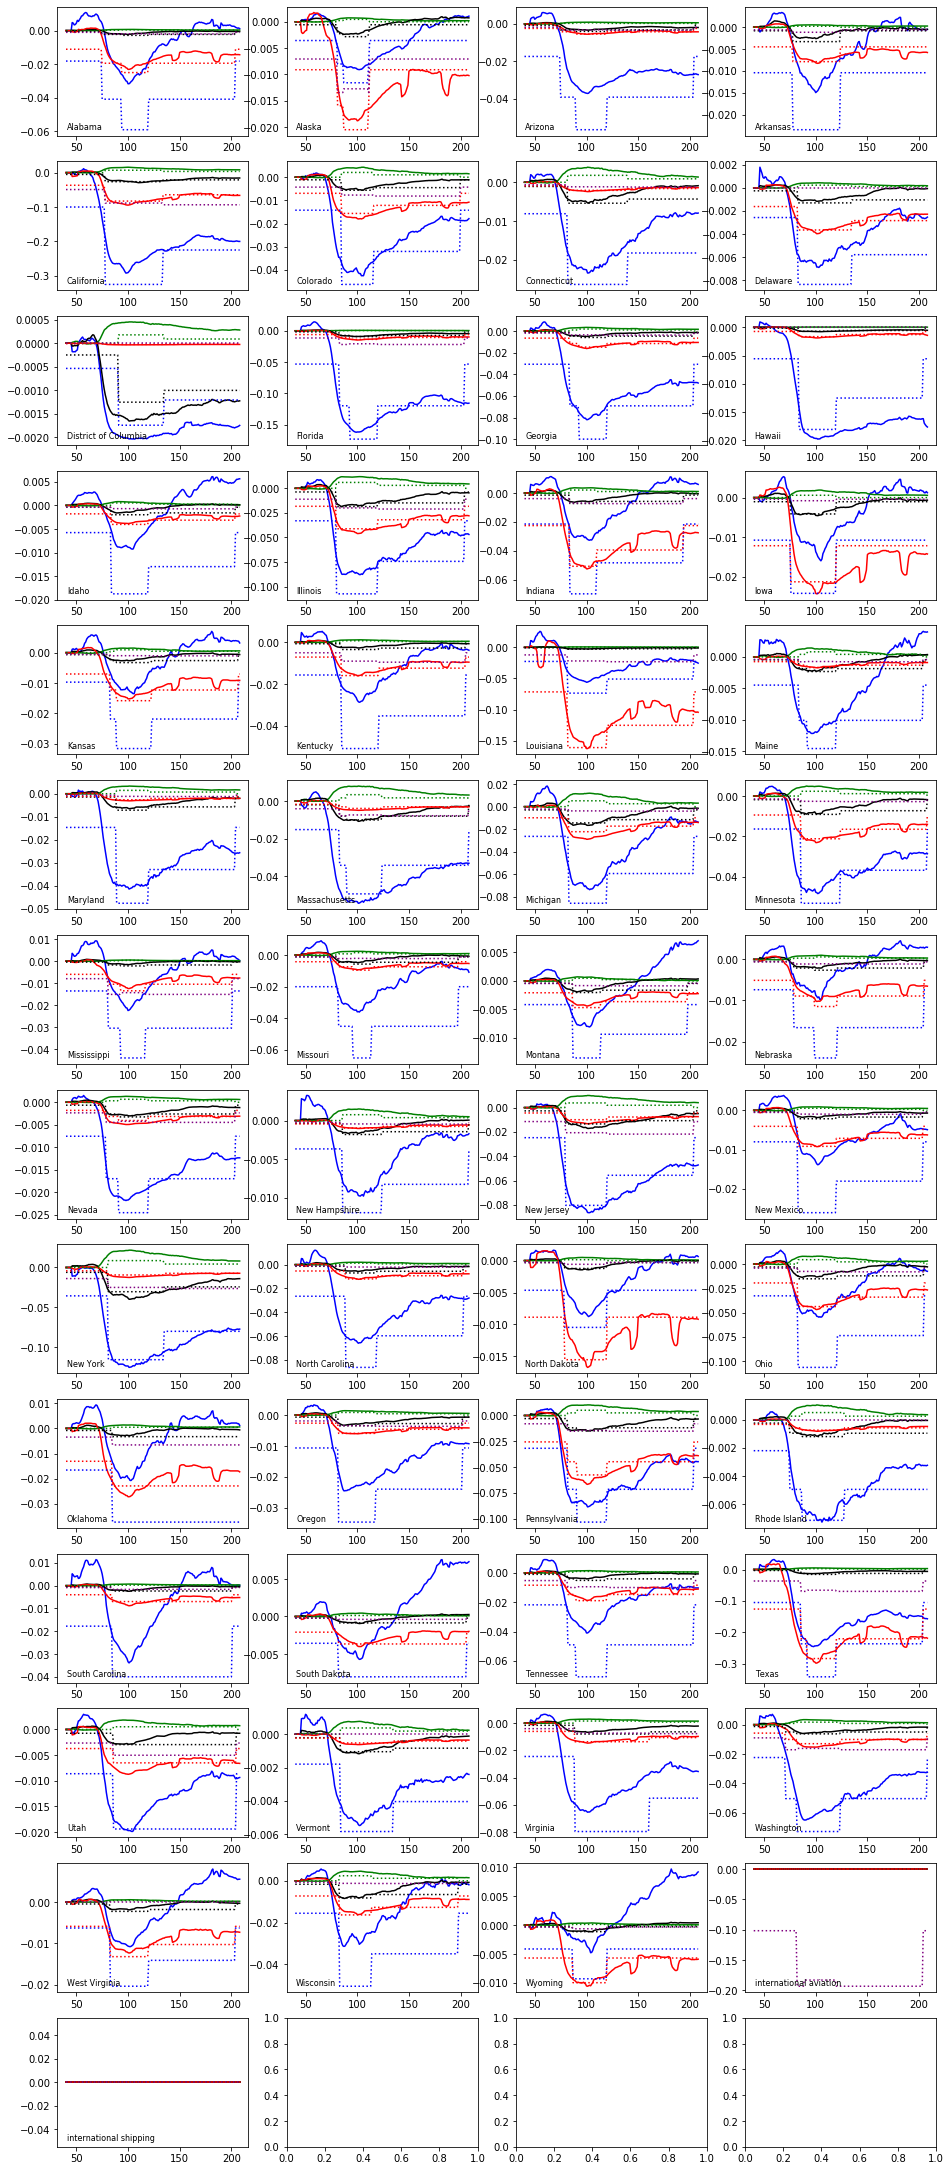

In [42]:
#US 143 to 195
    #    ci=134 #UK
def smooth(y,N=7):
    y_smooth=y
    if len(y)>1:
        y_padded = np.pad(np.nan_to_num(y), (N//2, N-1-N//2), mode='edge')
        y_smooth = np.convolve(y_padded, np.ones((N,))/N, mode='valid') 
    return y_smooth

base = np.empty([366,8,53]) #daily baseline for each country
base[:,:,:]=0.0
covid = base.copy()
covid[:,:,:]=0.0
covid_gus=base.copy()
covid_gus[:,:,:] =0.0 

jday=np.arange(366)
states=gogu.sub_region_1.unique()

fig, ax = pl.subplots(14,4, figsize=(40/2.54, 100/2.54))
ip =0
jp=0
for ist1 in range(143,196):#143 to 194 add to for planes and boats
    ist=ist1-143
    cname=cor.loc[ist1,'Index scale']
#    print (trsp[ist],dtrsp)
#    cname =states[ist]
#    print (ist,cname)
    #google stuff here
    x=gogu[gogu['sub_region_1']==cname]['jday'].to_numpy().astype(int)
#    print(gogu[gogu['sub_region_1']==cname]['transit'].isna().size)
    covid_gus[x,0,ist] =smooth(gogu[gogu['sub_region_1']==cname]['transit'].to_numpy()*trsp[ist1]/100)
    covid_gus[x,1,ist] =smooth(gogu[gogu['sub_region_1']==cname]['residential'].to_numpy()*res[ist1]/100)
#    print (covid_gus[x,3,ist].shape,gogu[gogu['sub_region_1']==cname]['retail'].to_numpy().shape,com[ist1],ind[ist1])
    covid_gus[x,2,ist] = smooth(gogu[gogu['sub_region_1']==cname]['retail'].to_numpy()*com[ist1]/100)
    covid_gus[x,3,ist] = smooth(gogu[gogu['sub_region_1']==cname]['work'].to_numpy()*ind[ist1]/100)
    for i in range(366):
        base[i,0,ist]=trsp[ist1]
        base[i,1,ist]=res[ist1]
        base[i,2,ist]=com[ist1]
        base[i,3,ist]=ind[ist1]
        base[i,4,ist]=ishi[ist1]
        base[i,5,ist]=iavi[ist1]
        base[i,6,ist]=navi[ist1]
        base[i,7,ist]=pwd[ist1]
        if level[i,ist1] == 1:
            covid[i,0,ist]=dtrsp[0]*trsp[ist1]
            covid[i,1,ist]=dres[0]*res[ist1]
            covid[i,2,ist]=dcom[0]*com[ist1]
            covid[i,3,ist]=dind[0]*ind[ist1]
            covid[i,4,ist]=dishi[0]*ishi[ist1]
            covid[i,5,ist]=diavi[0]*iavi[ist1]
            covid[i,6,ist]=dnavi[0]*navi[ist1]
            covid[i,7,ist]=dpwd[0]*pwd[ist1]
        if level[i,ist1] == 2:
            covid[i,0,ist]=dtrsp[1]*trsp[ist1]
            covid[i,1,ist]=dres[1]*res[ist1]
            covid[i,2,ist]=dcom[1]*com[ist1]
            covid[i,3,ist]=dind[1]*ind[ist1]
            covid[i,4,ist]=dishi[1]*ishi[ist1]
            covid[i,5,ist]=diavi[1]*iavi[ist1]
            covid[i,6,ist]=dnavi[1]*navi[ist1]
            covid[i,7,ist]=dpwd[1]*pwd[ist1]
        if level[i,ist1] == 3:
            covid[i,0,ist]=dtrsp[2]*trsp[ist1]
            covid[i,1,ist]=dres[2]*res[ist1]
            covid[i,2,ist]=dcom[2]*com[ist1]
            covid[i,3,ist]=dind[2]*ind[ist1]
            covid[i,4,ist]=dishi[2]*ishi[ist1]
            covid[i,5,ist]=diavi[2]*iavi[ist1]
            covid[i,6,ist]=dnavi[2]*navi[ist1]
            covid[i,7,ist]=dpwd[2]*pwd[ist1]
    #plot state
    # update this number whwn updating the work with new google data
    end=209
    ax[ip,jp].plot(jday[40:end],covid_gus[40:end,0,ist],color='blue',label='Google:transit')
    ax[ip,jp].plot(jday[40:end],covid_gus[40:end,1,ist],color='green',label='Google:residential')
    ax[ip,jp].plot(jday[40:end],covid_gus[40:end,2,ist],color='black',label='Google:retail')
    ax[ip,jp].plot(jday[40:end],covid_gus[40:end,3,ist],color='red',label='Google:work')

    ax[ip,jp].plot(jday[40:end],covid[40:end,0,ist],color='blue',linestyle=':',label='LeQuere:dtrsp')
    ax[ip,jp].plot(jday[40:end],covid[40:end,1,ist],color='green',linestyle=':',label='LeQuere:dres')
    ax[ip,jp].plot(jday[40:end],covid[40:end,2,ist],color='black',linestyle=':',label='LeQuere:dcom')
    ax[ip,jp].plot(jday[40:end],covid[40:end,3,ist],color='red',linestyle=':',label='LeQuere:dind')
    ax[ip,jp].plot(jday[40:end],covid[40:end,6,ist]+covid[40:end,5,ist],color='purple',linestyle=':',label='LeQuere:diavi')
    ax[ip,jp].text(.05,.05,cname,horizontalalignment='left',transform=ax[ip,jp].transAxes,fontsize=8)
#    ax[ip,jp].set_title(cname,fontsize=8)
    jp=jp+1
    if jp ==4:
        jp=0
        ip=ip+1
#print (base[:,0])
#for i in range(366):
#    for j in range(4):
#        covid[i,j]=covid[i,j]  #make whole US weighted trends
covid_us=covid.copy()
base_us=base.copy()
covid_gus_sum=covid_gus.sum(axis=2)
pl.savefig('states.pdf', bbox_inches='tight')


In [43]:
cor

,Row,country code,Index scale
0,1,ALB,Albania
1,2,DZA,Algeria
2,3,AGO,Angola
3,4,ARG,Argentina
4,5,ARM,Armenia
...,...,...,...
223,224,cn63,Qinghai
224,225,cn64,Ningxia
225,226,cn65,Xinjiang
226,227,ciavi,international aviation


In [44]:
covid_gus_sum.shape
len(gogc[gogc['country']=="Georgia"])

238

In [45]:
#china
 
base = np.empty([366,8,34]) #daily baseline for each country
base[:,:,:]=0.0
covid = base.copy()
covid[:,:,:]=0.0
covid_g = base.copy()
covid_g[:,:,:]=0.0
jday=np.arange(366)
for ist in range(196,228):
    cname=cor.loc[ist,'Index scale']
    print (ist,cname)
    #google stuff here
    ist1=ist-196
 
    for i in range(366):
        base[i,0,ist1]=trsp[ist]
        base[i,1,ist1]=res[ist]
        base[i,2,ist1]=com[ist]
        base[i,3,ist1]=ind[ist]
        base[i,4,ist1]=ishi[ist]
        base[i,5,ist1]=iavi[ist]
        base[i,6,ist1]=navi[ist]
        base[i,7,ist1]=pwd[ist]
        if level[i,ist] == 1:
            covid[i,0,ist1]=dtrsp[0]*trsp[ist]
            covid[i,1,ist1]=dres[0]*res[ist]
            covid[i,2,ist1]=dcom[0]*com[ist]
            covid[i,3,ist1]=dind[0]*ind[ist]
            covid[i,4,ist1]=dishi[0]*ishi[ist]
            covid[i,5,ist1]=diavi[0]*iavi[ist]
            covid[i,7,ist1]=dpwd[0]*pwd[ist]
        if level[i,ist] == 2:
            covid[i,0,ist1]=dtrsp[1]*trsp[ist]
            covid[i,1,ist1]=dres[1]*res[ist]
            covid[i,2,ist1]=dcom[1]*com[ist]
            covid[i,3,ist1]=dind[1]*ind[ist]
            covid[i,4,ist1]=dishi[1]*ishi[ist]
            covid[i,5,ist1]=diavi[1]*iavi[ist]
            covid[i,6,ist1]=dnavi[1]*navi[ist]
            covid[i,7,ist1]=dpwd[1]*pwd[ist]
        if level[i,ist] == 3:
            covid[i,0,ist1]=dtrsp[2]*trsp[ist]
            covid[i,1,ist1]=dres[2]*res[ist]
            covid[i,2,ist1]=dcom[2]*com[ist]
            covid[i,3,ist1]=dind[2]*ind[ist]
            covid[i,4,ist1]=dishi[2]*ishi[ist]
            covid[i,5,ist1]=diavi[2]*iavi[ist]
            covid[i,6,ist1]=dnavi[2]*navi[ist]
            covid[i,7,ist1]=dpwd[2]*pwd[ist]

covid_c=covid.copy() #emissions 
base_c=base.copy()


196 Beijing
197 Tianjin
198 Hebei
199 Shanxi
200 Inner Mongolia
201 Liaoning
202 Jilin
203 Heilongjiang
204 Shanghai
205 Jiangsu
206 Zhejiang
207 Anhui
208 Fujian
209 Jiangxi
210 Shandong
211 Henan
212 Hubei
213 Hunan
214 Guangdong
215 Guangxi
216 Hainan
217 Chongqing
218 Sichuan
219 Guizhou
220 Yunnan
221 Shaanxi
222 Gansu
223 Qinghai
224 Ningxia
225 Xinjiang
226 international aviation
227 international shipping


139
139


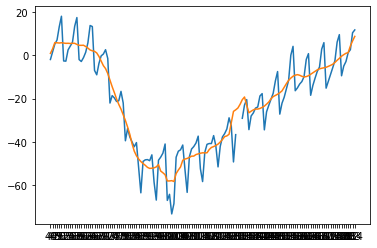

In [46]:



y=np.squeeze(a1.loc[(a1['region']=='Australia')
       & (a1['transportation_type']
          =='driving' )].drop(['region','mean','transportation_type'] 
                              ,axis=1).to_numpy())
x=a1.loc[(a1['region']=='Australia')
       & (a1['transportation_type']
          =='driving' )].drop(['region','mean','transportation_type'] 
                              ,axis=1).columns.to_numpy()

y1=smooth(y)
pl.plot(x,y)
pl.plot(x,y1)
print (len(y))
print (len(y1))

In [47]:
#other countries
 
base = np.empty([366,8,143]) #daily baseline for each country
base[:,:,:]=0.0
covid = base.copy()
covid[:,:,:]=0.0
covid_g = base.copy()
covid_a=base.copy()
covid_a[:,:,:]=0.0 #a1 database has region
covid_g[:,:,:]=0.0
jday=np.arange(366)
for ist in range(0,143):
    cname=cor.loc[ist,'Index scale']
    print (ist,cname)
    #google stuff here
    x=gogc[gogc['country']==cname]['jday'].to_numpy().astype(int)
    ay=np.squeeze(a1.loc[(a1['region']==cname)
       & (a1['transportation_type']
          =='driving' )].drop(['region','mean','transportation_type'] 
                              ,axis=1).to_numpy())
    ax=a1.loc[(a1['region']==cname)
       & (a1['transportation_type']
          =='driving' )].drop(['region','mean','transportation_type'] 
                              ,axis=1).columns.to_numpy()
    if ay.size >=1: covid_a[ax.astype(int),0,ist]=ay*trsp[ist]/100
        
    if x.size >=1:
#        print(gogc[gogc['country']==cname]['transit'].isna().size)
        covid_g[x,0,ist] =smooth(gogc[gogc['country']==cname]['transit'].to_numpy()*trsp[ist]/100)
        covid_g[x,1,ist] =smooth(gogc[gogc['country']==cname]['residential'].to_numpy()*res[ist]/100)
        covid_g[x,2,ist] = smooth(gogc[gogc['country']==cname]['retail'].to_numpy()*com[ist]/100)
        covid_g[x,3,ist] = smooth(gogc[gogc['country']==cname]['work'].to_numpy()*ind[ist]/100)
#    print (trsp[ist],dtrsp)
    for i in range(366):
        base[i,0,ist]=trsp[ist]
        base[i,1,ist]=res[ist]
        base[i,2,ist]=com[ist]
        base[i,3,ist]=ind[ist]
        base[i,4,ist]=ishi[ist]
        base[i,5,ist]=iavi[ist]
        base[i,6,ist]=navi[ist]
        base[i,7,ist]=pwd[ist]
        if level[i,ist] == 1:
            covid[i,0,ist]=dtrsp[0]*trsp[ist]
            covid[i,1,ist]=dres[0]*res[ist]
            covid[i,2,ist]=dcom[0]*com[ist]
            covid[i,3,ist]=dind[0]*ind[ist]
            covid[i,4,ist]=dishi[0]*ishi[ist]
            covid[i,5,ist]=diavi[0]*iavi[ist]
            covid[i,6,ist]=dnavi[0]*navi[ist]
            covid[i,7,ist]=dpwd[0]*pwd[ist]
        if level[i,ist] == 2:
            covid[i,0,ist]=dtrsp[1]*trsp[ist]
            covid[i,1,ist]=dres[1]*res[ist]
            covid[i,2,ist]=dcom[1]*com[ist]
            covid[i,3,ist]=dind[1]*ind[ist]
            covid[i,4,ist]=dishi[1]*ishi[ist]
            covid[i,5,ist]=diavi[1]*iavi[ist]
            covid[i,6,ist]=dnavi[1]*navi[ist]
            covid[i,7,ist]=dpwd[1]*pwd[ist]
        if level[i,ist] == 3:
            covid[i,0,ist]=dtrsp[2]*trsp[ist]
            covid[i,1,ist]=dres[2]*res[ist]
            covid[i,2,ist]=dcom[2]*com[ist]
            covid[i,3,ist]=dind[2]*ind[ist]
            covid[i,4,ist]=dishi[2]*ishi[ist]
            covid[i,5,ist]=diavi[2]*iavi[ist]
            covid[i,6,ist]=dnavi[2]*navi[ist]
            covid[i,7,ist]=dpwd[2]*pwd[ist]
covid_e=covid.copy() #emissions 
base_e=base.copy()
covid_e[:,:,135]=covid_us.sum(axis=2)
base_e[:,:,135]=base_us.sum(axis=2)
covid_e[:,:,23]=covid_c.sum(axis=2)#china
base_e[:,:,23]=base_c.sum(axis=2) #china
covid_g[:,:,135]=covid_gus_sum

0 Albania
1 Algeria
2 Angola
3 Argentina
4 Armenia
5 Australia
6 Austria
7 Azerbaijan
8 Bahrain
9 Bangladesh
10 Belarus
11 Belgium
12 Benin
13 Bolivia
14 Bosnia and Herzegovina
15 Botswana
16 Brazil
17 Brunei Darussalam
18 Bulgaria
19 Cambodia
20 Cameroon
21 Canada
22 Chile
23 China
24 Colombia
25 Congo
26 Costa Rica
27 Côte d'Ivoire
28 Croatia
29 Cuba
30 Curaçao
31 Cyprus
32 Czech Republic
33 North Korea
34 Democratic Republic of the Congo
35 Denmark
36 Dominican Republic
37 Ecuador
38 Egypt
39 El Salvador
40 Eritrea
41 Estonia
42 Ethiopia
43 Finland
44 France
45 Gabon
46 Georgia
47 Germany
48 Ghana
49 Gibraltar
50 Greece
51 Guatemala
52 Haiti
53 Honduras
54 Hong Kong
55 Hungary
56 Iceland
57 India
58 Indonesia
59 Iran
60 Iraq
61 Ireland
62 Israel
63 Italy
64 Jamaica
65 Japan
66 Jordan
67 Kazakhstan
68 Kenya
69 South Korea
70 Kosovo
71 Kuwait
72 Kyrgyzstan
73 Latvia
74 Lebanon
75 Libya
76 Lithuania
77 Luxembourg
78 Malaysia
79 Malta
80 Mauritius
81 Mexico
82 Moldova
83 Mongolia
84 Mon

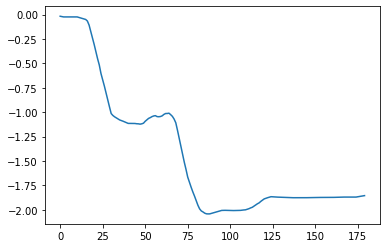

In [48]:
def moving_average(a, n=7) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n




y=moving_average(np.squeeze((covid_e[:,6,:180].sum(axis=1)+covid_e[:,5,:180].sum(axis=1))))
yc=np.squeeze(base_e[:,0,:180].sum(axis=1))
pl.plot(y[0:180])

In [49]:
base_e[:,:,49]=1.0E-30
np.save('corinne_c_high',covid_e)
np.save('corinne_b',base_e)
np.save('corinne_cus_high',covid_us)
np.save('corinne_cchina_high',covid_c)
np.save('corinne_bus',base_us)
np.save('corinne_bchina',base_c)

In [50]:
covid_g.shape
#cor[0:142]

(366, 8, 143)

[0. 0. 0. 0. 0. 0. 0. 0.]


array([], shape=(0, 3), dtype=int64)

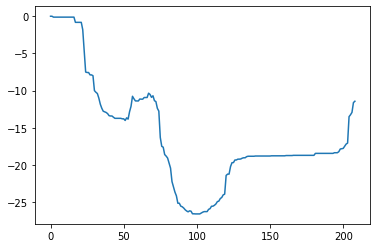

In [51]:

c=covid_e[0:end,:,:183].sum(axis=-1).sum(axis=-1)
b=base_e[0:end,:,:183].sum(axis=-1).sum(axis=-1)
pl.plot(100*c/b)

print (covid_e[56,:,49])
np.argwhere(np.isnan(covid_e))


In [52]:
# commerce for retail, public 4 workres, res4 res, transport 4 transit 

In [53]:
covid_gus_sum.shape

(366, 8)

/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/earpmf/opt/anaconda3

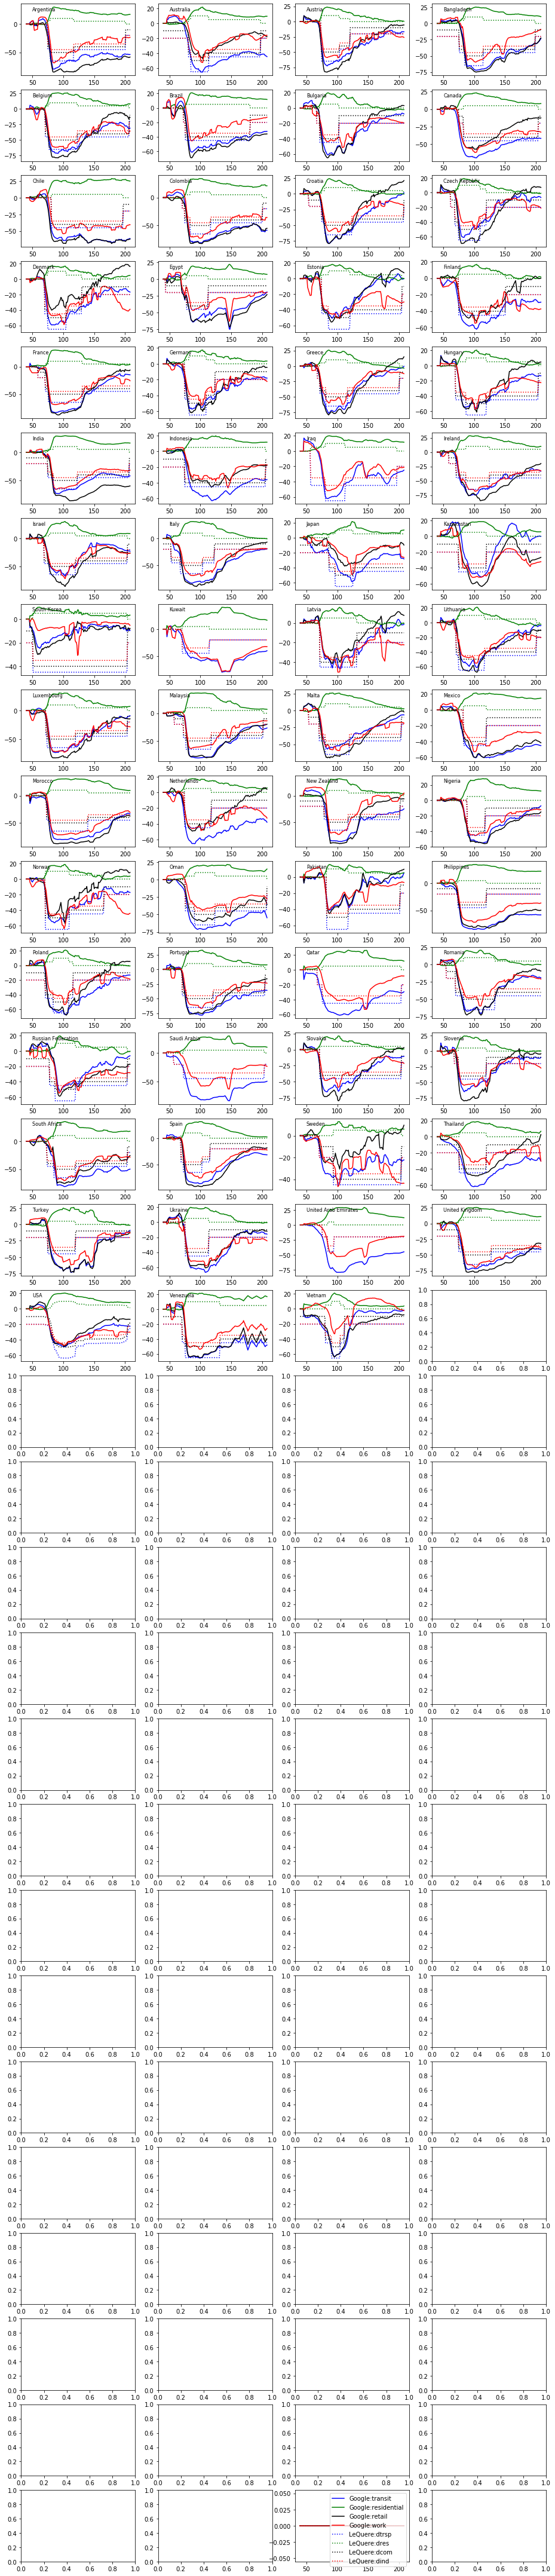

In [54]:
#emission weighted
ip=0
icount=0
jp=0
fig, ax = pl.subplots(30,4, figsize=(40/2.54, 200/2.54))
ist=0
for ci in range(143):
    cname=cor.loc[ci,'Index scale']
#    print ('in',ci,cname)
    ygtra=gogc[gogc['country']==cname]['transit'].to_numpy()
    if ygtra.size >1:
#        print ('found',ci,cname)
    #    ci=134 #UK
        base = np.empty([366,8]) #daily baseline for each country
        base[:,:]=base_e[:,:,ist]
        covid = base.copy()
#        covid[:,:] =covid_e[:,:,ist] this does units of Mtday
        covid[:,:] =100*covid_e[:,:,ist]/base_e[:,:,ist] #this does percent
#        print ('analysed', ci,cname)
        #end loops
       
#        ygtra=covid_g[40:101,0,ist]
#        ygres=covid_g[40:101,1,ist]
#        ygret=covid_g[40:101,2,ist]
#        ygwor=covid_g[40:101,3,ist]
        ygtra=100*covid_g[40:end,0,ist]/base_e[40:end,0,ist]
        ygres=100*covid_g[40:end,1,ist]/base_e[40:end,1,ist]
        ygret=100*covid_g[40:end,2,ist]/base_e[40:end,2,ist]
        ygwor=100*covid_g[40:end,3,ist]/base_e[40:end,3,ist]
        xg=jday[40:end]
        if covid[120,0] !=0:
            ax[ip,jp].plot(xg,ygtra,color='blue',label='Google:transit')
            ax[ip,jp].plot(xg,ygres,color='green',label='Google:residential')
            ax[ip,jp].plot(xg,ygret,color='black',label='Google:retail')
            ax[ip,jp].plot(xg,ygwor,color='red',label='Google:work')
        
            ax[ip,jp].plot(jday[40:end],covid[40:end,0],color='blue',linestyle=':',label='LeQuere:dtrsp')
            ax[ip,jp].plot(jday[40:end],covid[40:end,1],color='green',linestyle=':',label='LeQuere:dres')
            ax[ip,jp].plot(jday[40:end],covid[40:end,2],color='black',linestyle=':',label='LeQuere:dcom')
            ax[ip,jp].plot(jday[40:end],covid[40:end,3],color='red',linestyle=':',label='LeQuere:dind')
            if covid[80,0] !=0:icount=icount+1
            ax[ip,jp].text(.1,.9,cname,horizontalalignment='left',transform=ax[ip,jp].transAxes,fontsize=8)
#        ax[ip,jp].set_title(cname,fontsize=8)
            jp=jp+1
            if jp ==4:
                jp=0
                ip=ip+1
    ist=ist+1   
#sums


ip=29
jp=2

x=xg
y=ygres
y[:]=0
ax[ip,jp].plot(x,y,color='blue',label='Google:transit')
ax[ip,jp].plot(x,y,color='green',label='Google:residential')
ax[ip,jp].plot(x,y,color='black',label='Google:retail')
ax[ip,jp].plot(x,y,color='red',label='Google:work')
ax[ip,jp].plot(x,y*100,color='blue',linestyle=':',label='LeQuere:dtrsp')
ax[ip,jp].plot(x,y*100,color='green',linestyle=':',label='LeQuere:dres')
ax[ip,jp].plot(x,y*100,color='black',linestyle=':',label='LeQuere:dcom')
ax[ip,jp].plot(x,y*100,color='red',linestyle=':',label='LeQuere:dind')
ax[ip,jp].legend(fontsize=10)
#        ax[ip,jp].set_xlabel('Days since 1 Jan 2020')
#        ax[ip,jp].set_ylabel('Percentage change')
#pl.savefig('countries.png', bbox_inches='tight')
pl.savefig('countries.pdf', bbox_inches='tight')

In [55]:
icount

59

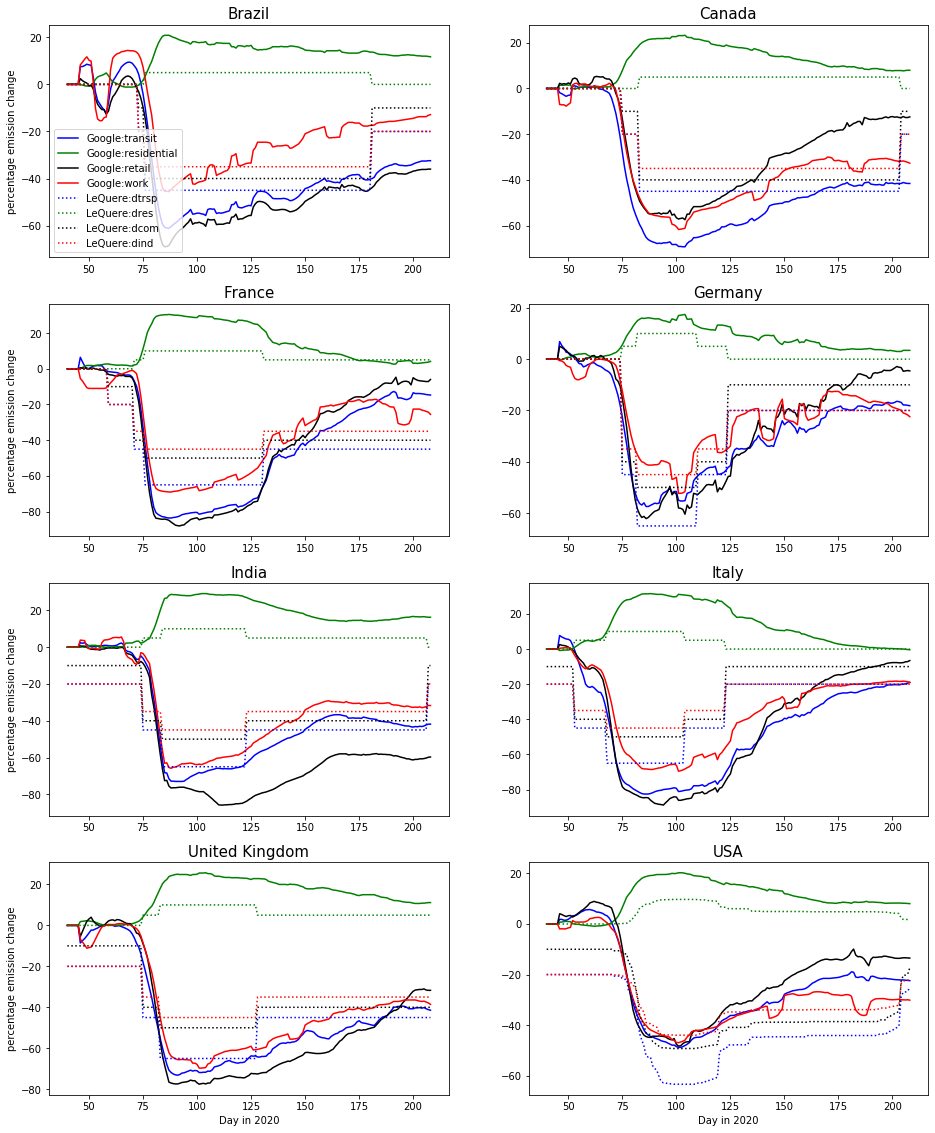

In [56]:
#emission weighted
#pl.style.use('seaborn-poster') #sets the size of the charts
#pl.style.use('ggplot')
ip=0
jp=0
fig, ax = pl.subplots(4,2, figsize=(40/2.54, 50/2.54))
ist=0
cpick=['Brazil','India','USA','Canada','United Kingdom','France','Germany','Italy','Canada']
for ci in range(143):
    cname=cor.loc[ci,'Index scale']
    if any(t==cname for t in cpick):
    #    print ('in',ci,cname)
        ygtra=gogc[gogc['country']==cname]['transit'].to_numpy()
        if ygtra.size >1:
    #        print ('found',ci,cname,ip,jp)
        #    ci=134 #UK
            base = np.empty([366,8]) #daily baseline for each country
            base[:,:]=base_e[:,:,ist]
            covid = base.copy()
    #        covid[:,:] =covid_e[:,:,ist] this does units of Mtday
            covid[:,:] =100*covid_e[:,:,ist]/base_e[:,:,ist] #this does percent
    #        print ('analysed', ci,cname)
            #end loops

    #        ygtra=covid_g[40:101,0,ist]
    #        ygres=covid_g[40:101,1,ist]
    #        ygret=covid_g[40:101,2,ist]
    #        ygwor=covid_g[40:101,3,ist]
            ygtra=100*covid_g[40:end,0,ist]/base_e[40:end,0,ist]
            ygres=100*covid_g[40:end,1,ist]/base_e[40:end,1,ist]
            ygret=100*covid_g[40:end,2,ist]/base_e[40:end,2,ist]
            ygwor=100*covid_g[40:end,3,ist]/base_e[40:end,3,ist]
            xg=jday[40:end]

            ax[ip,jp].plot(xg,ygtra,color='blue',label='Google:transit')
            ax[ip,jp].plot(xg,ygres,color='green',label='Google:residential')
            ax[ip,jp].plot(xg,ygret,color='black',label='Google:retail')
            ax[ip,jp].plot(xg,ygwor,color='red',label='Google:work')
            ax[ip,jp].plot(jday[40:end],covid[40:end,0],color='blue',linestyle=':',label='LeQuere:dtrsp')
            ax[ip,jp].plot(jday[40:end],covid[40:end,1],color='green',linestyle=':',label='LeQuere:dres')
            ax[ip,jp].plot(jday[40:end],covid[40:end,2],color='black',linestyle=':',label='LeQuere:dcom')
            ax[ip,jp].plot(jday[40:end],covid[40:end,3],color='red',linestyle=':',label='LeQuere:dind')
            ax[ip,jp].set_title(cname,fontsize=15)
            if jp==0: ax[ip,jp].set_ylabel('percentage emission change')
            if ip==3: ax[ip,jp].set_xlabel('Day in 2020')
            
            jp=jp+1
            if jp ==2:
                jp=0
                ip=ip+1

    ist=ist+1   
#sums


ax[0,0].legend(fontsize=10)
#        ax[ip,jp].set_xlabel('Days since 1 Jan 2020')
#        ax[ip,jp].set_ylabel('Percentage change')
#pl.savefig('countries.png', bbox_inches='tight')
#pl.savefig('countries.pdf', bbox_inches='tight')

In [57]:
covid_e.shape

(366, 8, 143)

In [58]:
#import matplotlib.pyplot as plt
#fig, ax = pl.subplots(20,4, figsize=(40/2.54, 150/2.54))
#i =0
#j=0
#google jan 3rd to Feb 6 baseline
#apple compared to a baseline volume on 13 January 2020. 
#apple starts 13 Jan, so take first 25days and average to make compsarable to Google
t=0
w=0
d=0
gtt=0
gtw=0
gtd=0
countt=0
countd=0
countw=0
countw=0
weights=np.zeros(70)



gtm=np.zeros(55)
adm=np.zeros(70)
ctm=np.zeros(55)

for c in a1.region.unique():
    a1s=a1.copy().loc[a1.region == c]

    sg=sum(a1s.transportation_type =='google_transit')
    st=sum(a1s.transportation_type =='transit')
    sw=sum(a1s.transportation_type =='walking')
    sd=sum(a1s.transportation_type =='driving')
    if sg >0 and st >0:
        gtt=gtt+a1s.loc[a1s.transportation_type =='google_transit']['mean'].values[0]
        t=t+a1s.loc[a1s.transportation_type =='transit']['mean'].values[0]
        countt=countt+1
    if sg >0 and sw >0:
        gtw=gtw+a1s.loc[a1s.transportation_type =='google_transit']['mean'].values[0]
        w=w+a1s.loc[a1s.transportation_type =='walking']['mean'].values[0]
        countw=countw+1
    if sd >0:
#        print (c,a1s.loc[a1s.transportation_type =='driving']['mean'].values[0])
        weights[countd] =trsp[cor.index[cor['Index scale']==c][0]]
#        gtd=gtd+a1s.loc[a1s.transportation_type =='google_transit']['mean'].values[0]
        d=d+a1s.loc[a1s.transportation_type =='driving']['mean'].values[0]
#        gtm[countd]=a1s.loc[a1s.transportation_type =='google_transit']['mean'].values[0]
        adm[countd]=a1s.loc[a1s.transportation_type =='driving']['mean'].values[0]
#        ctm[countd]=100*covid_e[90:121,0,cor.index[cor['Index scale']==c][0]].mean()/base_e[0,0,cor.index[cor['Index scale']==c][0]]
        countd=countd+1
        ws=ws+weight
        print (c,adm[countd-1])
        
print,('google, apple, count')
print ('transit ', gtt/countt,t/countt,countt)
print ('walking ', gtw/countw,w/countw,countw)
print ('driving ', gtd/countd,d/countd,countd)

#    print (c,
    
#    ax[j,i].bar(a1s['transportation_type'],a1s['mean'])
#    ax[j,i].set_title=c
#    i=i+1
#    if i==4:
#        i=0
#        j=j+1
    #endif



Albania -70.9852989905445
Argentina -79.00707369273566
Australia -50.03685166230057
Austria -55.44693369540621
Belgium -57.57565236603515
Brazil -50.301628584894125
Bulgaria -65.91758496057956
Cambodia -68.37271738481942
Canada -49.83726923669328
Chile -67.96217285012953
Colombia -70.61113329976092
Croatia -65.19004723084326
Czech Republic -33.790465491069334
Denmark -23.962877668074047
Egypt -59.76123417320037
Estonia -30.88328772754718
Finland -25.48169227239613
France -72.10149385647193
Germany -42.92286174833578
Greece -72.05538477927807
Hong Kong -40.67537949379591
Hungary -48.12733852999102
Iceland -50.81513625682809
India -84.18347969201378
Indonesia -63.54456573858211
Ireland -74.00211508673542
Israel -59.47658500212723
Italy -79.73346566382475
Japan -27.340304116450543
Latvia -36.694209177050894
Lithuania -42.01548520683851
Luxembourg -65.78562091503268
Malaysia -61.861602952556964
Mexico -61.635407918882755
Morocco -85.53386386929525
Netherlands -45.519339803417665
New Zealan

18.919998462311924


0.0

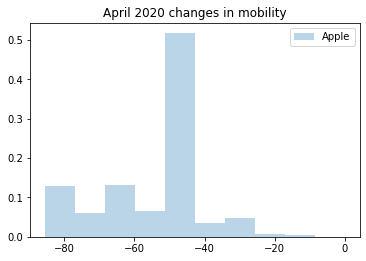

In [59]:
print(ws)
fig, ax = pl.subplots(1,1, figsize=(15/2.54, 10/2.54))
#ax.hist(ctm,weights=weights/weights.sum(),label='Le Quéré')
#ax.hist(gtm,weights=weights/weights.sum(),alpha=0.7,label='Google')
ax.hist(adm,weights=weights/weights.sum(),alpha=0.3,label='Apple')

ax.legend()
ax.set_title('April 2020 changes in mobility')
#pl.hist(gtm)
#pl.hist(adm,alpha=0.2)
adm1=adm
adm=adm
gtm1=gtm
def weight_array(ar, weights):
    zipped = zip(ar, weights)
    weighted = []
    for ik in zipped:
#        print (ik)
        for jk in range(ik[1]):
            weighted.append(ik[0])
    return weighted
w=(1000*weights).astype(int)
np.percentile(weight_array(gtm, w),50)
#print (adm)

In [60]:
print (ctm)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


found 2 2 Angola 0.0 -59.76190476190476
found 3 3 Argentina -62.999996683015716 -67.87142857142858
found 5 5 Australia -60.99999693454991 -60.414285714285704
found 6 6 Austria -54.333333333333336 -61.10476190476189
found 8 8 Bahrain 0.0 -36.17142857142857
found 9 9 Bangladesh -61.66666350465387 -69.50952380952381
found 10 10 Belarus 0.0 -23.40952380952381
found 11 11 Belgium -64.99999899683944 -66.02380952380953
found 12 12 Benin 0.0 -21.86190476190476
found 13 13 Bolivia 0.0 -84.2142857142857
found 14 14 Bosnia and Herzegovina 0.0 -52.16666666666667
found 15 15 Botswana 0.0 -70.30952380952381
found 16 16 Brazil -44.999997796961594 -54.37619047619049
found 18 18 Bulgaria -30.833332966168957 -53.93333333333332
found 19 19 Cambodia 0.0 -56.600000000000016
found 20 20 Cameroon 0.0 -23.676190476190477
found 21 21 Canada -45.0 -66.36666666666669
found 22 22 Chile -44.99999626818845 -60.276190476190486
found 24 24 Colombia -62.999995892763366 -77.5095238095238
found 26 26 Costa Rica 0.0 -62.

/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


found 60 60 Iraq -60.33332865060331 -51.96190476190475
found 61 61 Ireland -64.99999604391436 -70.23333333333333
found 62 62 Israel -64.9999968653944 -57.599999999999994
found 63 63 Italy -54.33333088361165 -78.94761904761904
found 64 64 Jamaica 0.0 -51.51904761904761
found 65 65 Japan -60.33333038001318 -41.48095238095239
found 66 66 Jordan 0.0 -81.8047619047619
found 67 67 Kazakhstan -44.99999692686208 -47.095238095238095
found 68 68 Kenya 0.0 -56.99047619047618
found 69 69 South Korea -44.99999948075733 -12.257142857142858
found 71 71 Kuwait -40.83333106216958 -56.78571428571428
found 72 72 Kyrgyzstan 0.0 -70.01904761904764
found 73 73 Latvia -44.99999844150614 -39.7047619047619
found 74 74 Lebanon 0.0 -75.59999999999998
found 75 75 Libya 0.0 -47.00000000000001
found 76 76 Lithuania -62.99999743789911 -53.12380952380953
found 77 77 Luxembourg -64.99999719324876 -67.80476190476189
found 78 78 Malaysia -63.6666651193635 -79.80476190476192
found 79 79 Malta -64.99999865148672 -50.38095

/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Industry')

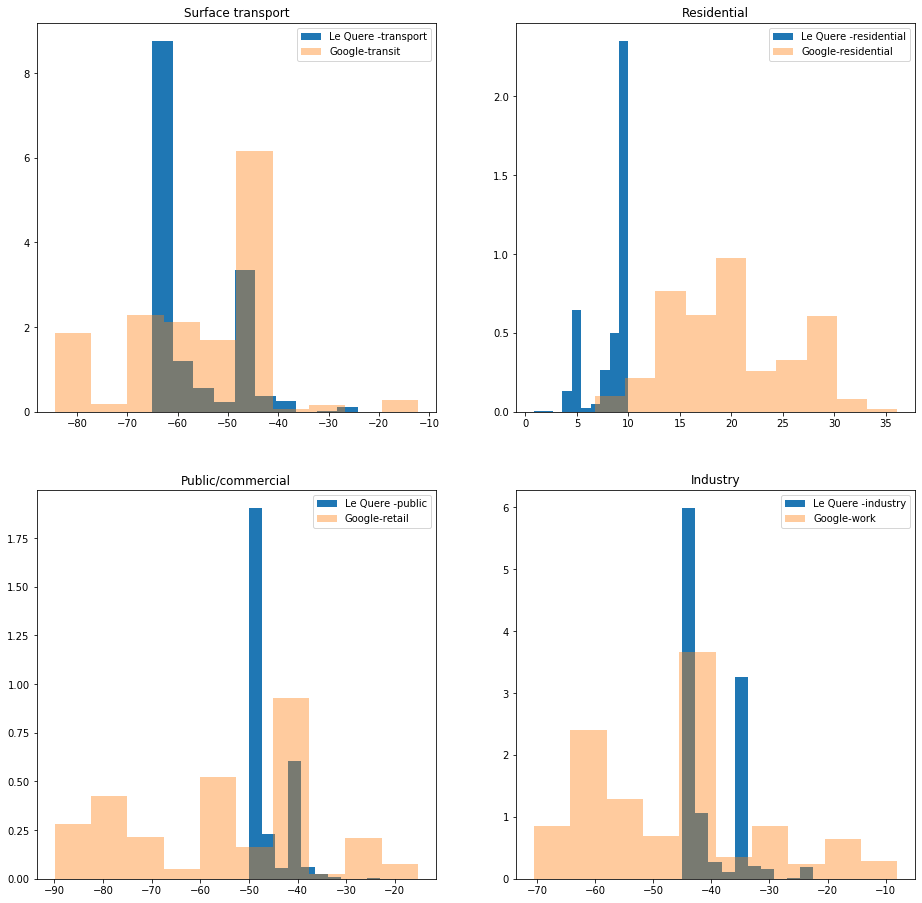

In [61]:
#emission weighted
ip=0
jp=0
#april scatter plot
gapr=np.empty([8,143])
gapr[:,:]=0
capr=np.empty([8,143])
capr[:,:]=0
aapr=np.empty([8,143])
aapr[:,:]=0
fig, ax = pl.subplots(2,2, figsize=(40/2.54, 40/2.54))
ist=0
count=0
counte=0
count1=0
counte1=0
count1a=0
counte1a=0
weights=np.empty([4,228])
weights[:,:]=0
weights[0,:]=trsp[:]
weights[1,:]=res[:]
weights[2,:]=com[:]
weights[3,:]=ind[:]
for ci in range(143):
    cname=cor.loc[ci,'Index scale']
#    print ('in',ci,cname)
    ygtra=gogc[gogc['country']==cname]['transit'].to_numpy()
    if ygtra.size >1:
#    if 1==1: 
        #Change here if you eant all
        count=count+1
        counte=counte+base_e[0,:,ist].sum()
        base = np.empty([366,8]) #daily baseline for each country
        base[:,:]=base_e[:,:,ist]
        covid = base.copy()

        capr[:,ist] =100*covid_e[90:120,:,ist].mean(axis=0)/base_e[90:120,:,ist].mean(axis=0) #this does percent
        gapr[0:4,ist]=100*covid_g[90:120,0:4,ist].mean(axis=0)/base_e[90:120,0:4,ist].mean(axis=0)
        aapr[0,ist]=100*covid_a[90:120,0,ist].mean(axis=0)/base_e[90:120,0,ist].mean(axis=0)
 #       capr[:,ist] =covid_e[90:120,:,ist].mean(axis=0) #this does percent
 #       gapr[0:4,ist]=covid_g[90:120,0:4,ist].mean(axis=0)
  #      aapr[0,ist]=covid_a[90:120,0,ist].mean(axis=0)
        print ('found',ci,ist,cname,capr[0,ist],gapr[0,ist])
        if capr[0,ist]!=0:
            count1=count1+1
            counte1=counte1+base_e[0,:,ist].sum()
        if aapr[0,ist]!=0:
            count1a=count1a+1
            counte1a=counte1a+base_e[0,:,ist].sum()
        

    ist=ist+1   
#sums
b=base_e[0,:,:][base_e[0,:,:]>0]
print (count,count1,count1a,counte/b.sum(),counte1/b.sum(),counte1a/b.sum())
idx=np.nonzero(capr[0,:])
apr=aapr[0,idx]
ap=apr[apr!=0]

ax[0,0].hist(np.squeeze(capr[0,idx]),weights=np.squeeze(weights[0,idx]),label='Le Quere -transport')
ax[0,0].hist(np.squeeze(gapr[0,idx]),weights=np.squeeze(weights[0,idx]),alpha=0.4,label='Google-transit')
#ax[0,0].hist(np.squeeze(ap),weights=np.squeeze(weights[0,idx]),alpha=0.4,label='Apple-transit')
ax[0,0].legend()
ax[0,0].set_title('Surface transport')
ax[0,1].hist(np.squeeze(capr[1,idx]),weights=np.squeeze(weights[1,idx]),label='Le Quere -residential')
ax[0,1].hist(np.squeeze(gapr[1,idx]),weights=np.squeeze(weights[1,idx]),alpha=0.4,label='Google-residential')
ax[0,1].legend()
ax[0,1].set_title('Residential')
ax[1,0].hist(np.squeeze(capr[2,idx]),weights=np.squeeze(weights[2,idx]),label='Le Quere -public')
ax[1,0].hist(np.squeeze(gapr[2,idx]),weights=np.squeeze(weights[2,idx]),alpha=0.4,label='Google-retail')
ax[1,0].legend()
ax[1,0].set_title('Public/commercial')
ax[1,1].hist(np.squeeze(capr[3,idx]),weights=np.squeeze(weights[3,idx]),label='Le Quere -industry')
ax[1,1].hist(np.squeeze(gapr[3,idx]),weights=np.squeeze(weights[3,idx]),alpha=0.4,label='Google-work')
ax[1,1].legend()
ax[1,1].set_title('Industry')
#ax[0,1].scatter(capr[1,idx],gapr[1,idx])
#ax[1,0].scatter(capr[2,idx],gapr[2,idx])
#ax[1,1].scatter(capr[3,idx],gapr[3,idx])

In [62]:

#np.save('capr_high_abs',capr)
#np.save('gapr_abs',gapr)
#np.save('aapr_abs',aapr)
#cor.to_csv('cor.csv')

In [63]:
import weighted
from matplotlib.cbook import violin_stats
from scipy import stats
import statsmodels.api as sm

def vdensity_with_weights(weights):
    ''' Outer function allows innder function access to weights. Matplotlib
    needs function to take in data and coords, so this seems like only way
    to 'pass' custom density function a set of weights '''

    def vdensity(data, coords):
        ''' Custom matplotlib weighted violin stats function '''
        # Using weights from closure, get KDE fomr statsmodels
        weighted_cost = sm.nonparametric.KDEUnivariate(data)
        weighted_cost.fit(fft=False, weights=weights)
                # Return y-values for graph of KDE by evaluating on coords
        return weighted_cost.evaluate(coords)
    return vdensity

def custom_violin_stats(data, weights):
    # Get weighted median and mean (using weighted module for median)
    median = weighted.quantile_1D(data, weights, 0.5)
    mean, sumw = np.ma.average(data, weights=list(weights), returned=True)

    # Use matplotlib violin_stats, which expects a function that takes in data and coords
    # which we get from closure above
    results = violin_stats(data, vdensity_with_weights(weights))

    # Update result dictionary with our updated info
    results[0][u"mean"] = mean
    results[0][u"median"] = median

    # No need to do this, since it should be populated from violin_stats
    # results[0][u"min"] =  np.min(data)
    # results[0][u"max"] =  np.max(data)

    return results

### Example
#vpstats1 = custom_violin_stats(np.asarray(df_column_data), np.asarray(df_column_weights))
#vplot = ax.violin(vpstats1, [pos_idx], vert=False, showmeans=True, showextrema=True, showmedians=True)
#current_color_palette = ...
#for pc in vplot['bodies']:
#    pc.set_facecolor(current_color_palette[pos_idx])
#    pc.set_edgecolor('black')

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


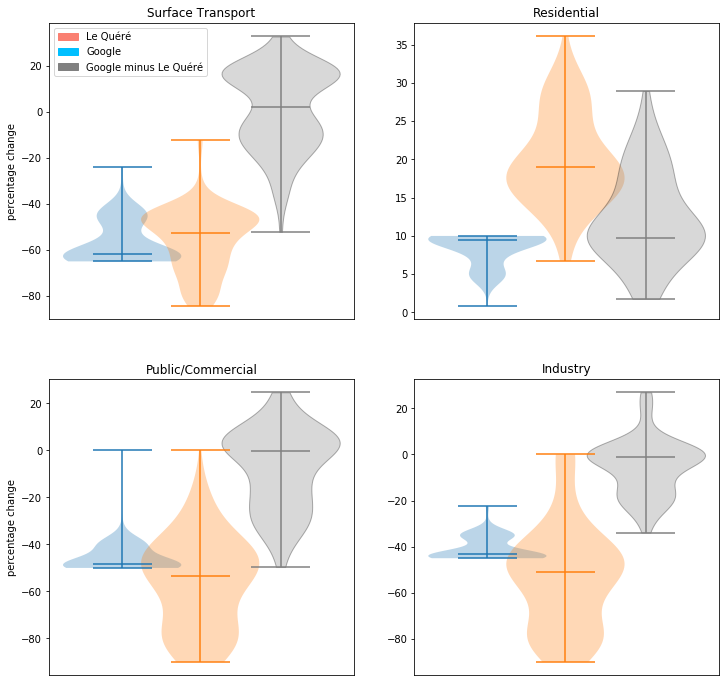

In [64]:
import matplotlib.patches as mpatches
from itertools import repeat

print(pl.rcParams['axes.prop_cycle'].by_key()['color'])
fig, ax = pl.subplots(nrows=2, ncols=2, figsize=(12, 12))

vpstats1 = custom_violin_stats(np.nan_to_num(np.squeeze(capr[0,idx])),np.squeeze(base_e[0,0,idx]))
vplot=ax[0,0].violin(vpstats1, [.33], vert=True,showextrema=True, showmedians=True)
vpstats1 = custom_violin_stats(np.nan_to_num(np.squeeze(gapr[0,idx])),np.squeeze(base_e[0,0,idx]))
vplot=ax[0,0].violin(vpstats1, [.66], vert=True,showextrema=True, showmedians=True)
vk=vpstats1
vpstats1 = custom_violin_stats(np.nan_to_num(np.squeeze(gapr[0,idx]))-np.nan_to_num(np.squeeze(capr[0,idx])),np.squeeze(base_e[0,0,idx]))
vplot=ax[0,0].violin(vpstats1, [1.], vert=True,showextrema=True, showmedians=True)
#vpstats1 = custom_violin_stats(np.nan_to_num(np.squeeze(aapr[0,idx])),np.squeeze(base_e[0,0,idx]))
#vplot=ax[0,0].violin(vpstats1, [1.0], vert=True,showextrema=True, showmedians=True)
ax[0,0].set_title('Surface Transport')
red_patch = mpatches.Patch(color='salmon')
blue_patch = mpatches.Patch(color='deepskyblue')
gray_patch = mpatches.Patch(color='darkgray')
mauve_patch = mpatches.Patch(color='gray')
    # 'fake' invisible object
fake_handles = [red_patch,blue_patch,mauve_patch]
ax[0,0].legend(fake_handles,['Le Quéré','Google','Google minus Le Quéré'],loc=2,fontsize=10)
for pc in vplot['bodies']:
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
for partname in ('cbars','cmins','cmaxes','cmedians'):
    vp = vplot[partname]
    vp.set_edgecolor('gray')
#    vp.set_linewidth(1)
#    pc.set_alpha(1)
ax[0,1].set_title('Residential')


vpstats1 = custom_violin_stats(np.nan_to_num(np.squeeze(capr[1,idx])),np.squeeze(base_e[0,1,idx]))
vplot=ax[0,1].violin(vpstats1, [.33], vert=True,showextrema=True, showmedians=True)
vpstats1 = custom_violin_stats(np.nan_to_num(np.squeeze(gapr[1,idx])),np.squeeze(base_e[0,1,idx]))
vplot=ax[0,1].violin(vpstats1, [.66], vert=True,showextrema=True, showmedians=True)
vpstats1 = custom_violin_stats(np.nan_to_num(np.squeeze(gapr[1,idx]))-np.nan_to_num(np.squeeze(capr[1,idx])),np.squeeze(base_e[0,0,idx]))
vplot=ax[0,1].violin(vpstats1, [1.], vert=True,showextrema=True, showmedians=True)
for pc in vplot['bodies']:
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
for partname in ('cbars','cmins','cmaxes','cmedians'):
    vp = vplot[partname]
    vp.set_edgecolor('gray')
#    vp.set_linewidth(1)
#    pc.set_alpha(1)
ax[0,1].set_title('Residential')
vpstats1 = custom_violin_stats(np.nan_to_num(np.squeeze(capr[2,idx])),np.squeeze(base_e[0,2,idx]))
vplot=ax[1,0].violin(vpstats1, [.33], vert=True,showextrema=True, showmedians=True)
vpstats1 = custom_violin_stats(np.nan_to_num(np.squeeze(gapr[2,idx])),np.squeeze(base_e[0,2,idx]))
vplot=ax[1,0].violin(vpstats1, [.66], vert=True,showextrema=True, showmedians=True)
vpstats1 = custom_violin_stats(np.nan_to_num(np.squeeze(gapr[2,idx]))-np.nan_to_num(np.squeeze(capr[2,idx])),np.squeeze(base_e[0,0,idx]))
vplot=ax[1,0].violin(vpstats1, [1.], vert=True,showextrema=True, showmedians=True)
for pc in vplot['bodies']:
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
for partname in ('cbars','cmins','cmaxes','cmedians'):
    vp = vplot[partname]
    vp.set_edgecolor('gray')
#    vp.set_linewidth(1)
#    pc.set_alpha(1)
ax[0,1].set_title('Residential')
ax[1,0].set_title('Public/Commercial')
vpstats1 = custom_violin_stats(np.nan_to_num(np.squeeze(capr[3,idx])),np.squeeze(base_e[0,3,idx]))
vplot=ax[1,1].violin(vpstats1, [.33], vert=True,showextrema=True, showmedians=True)
vpstats1 = custom_violin_stats(np.nan_to_num(np.squeeze(gapr[2,idx])),np.squeeze(base_e[0,3,idx]))
vplot=ax[1,1].violin(vpstats1, [.66], vert=True,showextrema=True, showmedians=True)
vpstats1 = custom_violin_stats(np.nan_to_num(np.squeeze(gapr[3,idx]))-np.nan_to_num(np.squeeze(capr[3,idx])),np.squeeze(base_e[0,0,idx]))
vplot=ax[1,1].violin(vpstats1, [1.], vert=True,showextrema=True, showmedians=True)
for pc in vplot['bodies']:
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
for partname in ('cbars','cmins','cmaxes','cmedians'):
    vp = vplot[partname]
    vp.set_edgecolor('gray')
#    vp.set_linewidth(1)
#    pc.set_alpha(1)
ax[0,1].set_title('Residential')
ax[1,1].set_title('Industry')
ax[0,0].set_ylabel('percentage change')
ax[1,0].set_ylabel('percentage change')
ax[0,0].axes.get_xaxis().set_visible(False)
ax[0,1].axes.get_xaxis().set_visible(False)
ax[1,0].axes.get_xaxis().set_visible(False)
ax[1,1].axes.get_xaxis().set_visible(False)


In [65]:
vplot.keys()

dict_keys(['bodies', 'cmaxes', 'cmins', 'cbars', 'cmedians'])

In [66]:
#do power sector based on google weighting of res, ind and commercial
#find where Google and Corinne data overlap
idy=[]
for ic in range(143):
#    print (ic,covid_g[100,0,ic],covid_e[100,0,ic])
    if covid_g[100,0,ic]!=0 and covid_e[100,0,ic]!=0: idy.append(ic)
#power proportial to weighted sum of industry/commercial res [1,2,3]
g=covid_g[:138,1:4,idy].sum(axis=-1).sum(axis=-1)/base_e[:138,1:4,idy].sum(axis=-1).sum(axis=-1)
c=covid_e[:138,7,idy].sum(axis=-1)/base_e[:138,7,idy].sum(axis=-1)
r=c/g
print (r[90:120].mean())
powerfactor=r[90:120].mean()
for ic in range(143):
    if covid_g[100,0,ic]!=0:
        frac=covid_g[:,1:4,ic].sum(axis=1)/base_e[:,1:4,ic].sum(axis=1)
        covid_g[:,7,ic]=base_e[:,7,ic]*frac*powerfactor
for ic in range(143):
#    print (ic,covid_g[100,0,ic],covid_e[100,0,ic])
    if covid_g[100,0,ic]!=0 and covid_e[100,0,ic]!=0: idy.append(ic)
#test
g=covid_g[:138,7,idy].sum(axis=-1)
c=covid_e[:138,7,idy].sum(axis=-1)  
r=c/g
print (r[90:120].mean())      
    

0.6093760805286474
1.0109419557080708


/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


In [67]:
frac.shape

(366,)

In [68]:
covid_g[82,1,77]=0
covid_g[89,1,77]=0
idy=[]
for ic in range(143):
    if covid_g[100,0,ic]!=0: idy.append(ic)
        
covid_e_glob=covid_e.sum(axis=2)
covid_g_glob=covid_g[:,:,idy].sum(axis=2)
base_e_glob=base_e.sum(axis=2)
base_g_glob=base_e[:,:,idy].sum(axis=2)
cperg=covid_g_glob/base_g_glob*100
cpere=covid_e_glob/base_e_glob*100

#google nan
for ic in range(52):
    f=np.argwhere(np.isnan(covid_gus[:,4,ic]))
    if len(f)>0: print ('US nan',ic,f)


np.save('google_c',covid_g)
np.save('google_cus',covid_gus)

#repalce corrine by google data where possible
covid_merge=covid_e.copy()
#covid_merge[:,0,idy]=covid_g[:,0,idy]*0.83
#covid_merge[:,1,idy]=covid_g[:,1,idy]*0.16
#covid_merge[:,2,idy]=covid_g[:,2,idy]*0.56
#covid_merge[:,3,idy]=covid_g[:,3,idy]*0.61
covid_merge[:,0:4,idy]=covid_g[:,0:4,idy]
covid_merge[:,7,idy]=covid_g[:,7,idy]#add new power
#change 4,5,6,7
#ps=covid_e[:,:,:].sum(axis=2)/base_e[:,:,:].sum(axis=2)
#pl.plot(ps[40:,0])
fn=np.argwhere(np.squeeze(covid_merge[100,4,:])==0) 
fw=np.argwhere(np.squeeze(covid_merge[100,0,:])!=0)
#for ic in fn:  #add missing countries 
#    covid_merge[:,4:7,ic[0]]=ps[:,4:7]*base_e[:,4:7,ic[0]]

#scale google to match corinne
#fw=np.argwhere(np.squeeze(covid_merge[100,0,:])!=0)
#for it in range(4):
#    rw=0
#    rb=0
#    for ic in fw:
#        if covid_g[90:120,it,ic[0]].sum()!=0:
#            r=covid_e[90:120,it,ic[0]].sum()/covid_g[90:120,it,ic[0]].sum()
#            rw=rw+r*base_e[0,it,ic[0]]
#            rb=rb+base_e[0,it,ic[0]]
#    #        print (ic,r,rw/rb)
#    print (it,rw/rb)
#np.save('google_cg_mid',covid_merge)



In [69]:

#fraction of co22 emissions accounted for
fn=np.argwhere(np.squeeze(covid_e[100,0,:])==0)
fw=np.argwhere(np.squeeze(covid_e[100,0,:])!=0)
print(len(f),len(fw))
print (base_e[100,:,fw].sum(),base_e[100,:,:].sum(),base_e[100,:,fw].sum()/base_e[100,:,:].sum()) #fracr co2 emisions

fng=np.argwhere(np.squeeze(covid_g[100,0,:])==0)
fwg=np.argwhere(np.squeeze(covid_g[100,0,:])!=0)
print(len(fng),len(fwg))
print (base_e[100,:,fwg].sum(),base_e[100,:,:].sum(),base_e[100,:,fwg].sum()/base_e[100,:,:].sum()) #fracr co2 emisions

fn=np.argwhere(np.squeeze(covid_merge[100,0,:])==0)
fw=np.argwhere(np.squeeze(covid_merge[100,0,:])!=0)
print(len(f),len(fw))
print (base_e[100,:,fw].sum(),base_e[100,:,:].sum(),base_e[100,:,fw].sum()/base_e[100,:,:].sum()) #fracr co2 emisions



0 69
91.8729361820524 96.72915688476655 0.9497956887135968
27 116
67.63872606859809 96.72915688476655 0.6992589230274808
0 122
95.89993844477726 96.72915688476655 0.991427419955938


    Row country code Index scale
67   68          KAZ  Kazakhstan


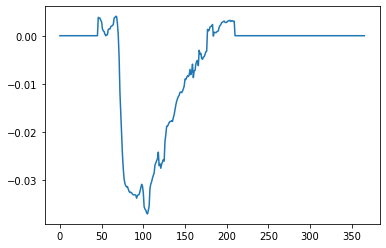

In [70]:
#1222 is all zero in google
#not used 
nstop=end
#qaverage scale
#pl.plot(covid_e[:,1,6])
#fw=np.argwhere(np.squeeze(covid_e[100,0,:])!=0)
#scale=np.empty([366,4])
#scale[:,:]=0
#for ic in fw:
#    print(ic[0],covid_e[140,1,ic[0]]/covid_e[121,1,ic[0]])
#    if covid_e[nstop,0,ic[0]]!=0: scale[nstop+1:,0]=scale[nstop+1:,0]+covid_e[nstop+1:,0,ic[0]]/covid_e[nstop,0,ic[0]]
#    if covid_e[nstop,1,ic[0]]!=0:scale[nstop+1:,1]=scale[nstop+1:,1]+covid_e[nstop+1:,1,ic[0]]/covid_e[nstop,1,ic[0]]
#    if covid_e[nstop,2,ic[0]]!=0:scale[nstop+1:,2]=scale[nstop+1:,2]+covid_e[nstop+1:,2,ic[0]]/covid_e[nstop,2,ic[0]]
#    if covid_e[nstop,3,ic[0]]!=0:scale[nstop+1:,3]=scale[nstop+1:,3]+covid_e[nstop+1:,3,ic[0]]/covid_e[nstop,3,ic[0]]
#scale[:,:]=scale[:,:]/len(fw)
#pl.plot(scale[:,3])
covid_merge2=covid_merge.copy()
#pl.plot(covid_merge[:,0,8])
#for ic in fwg:   #extend google data where le qurere data exists
#    covid_merge2[nstop+1:,0:4,ic[0]]=covid_merge[nstop,0:4,ic[0]]*covid_e[nstop+1:,0:4,ic[0]]/covid_e[nstop,0:4,ic[0]]
#pl.plot(covid_merge2[:,0,8])
#pl.plot(covid_e[:,0,8])
#where 122 iz zero
#c=np.argwhere(np.isnan(covid_merge2[nstop+1,0,:]))
#for ic in c:    #etend where only google data exists
#    print(ic,covid_merge2[nstop+1,1,ic[0]],covid_merge2[nstop,1,ic[0]])
#    covid_merge2[nstop+1:,0:4,ic[0]]=covid_merge2[nstop,0:4,ic[0]]*scale[nstop+1:,0:4]
#c=np.argwhere(np.isnan(covid_merge2[nstop+1,1,:]))
#for ic in c:
#    print(ic,covid_merge2[nstop+1,1,ic[0]],covid_merge2[nstop,1,ic[0]])
 #   covid_merge2[nstop+1:,0:4,ic[0]]=covid_merge2[nstop,0:4,ic[0]]*scale[nstop+1:,0:4]
#c=np.argwhere(np.isnan(covid_merge2[nstop+1,2,:]))    
#for ic in c:
#    print(ic,covid_merge2[nstop+1,1,ic[0]],covid_merge2[nstop,1,ic[0]])
#    covid_merge2[nstop+1:,0:4,ic[0]]=covid_merge2[nstop,0:4,ic[0]]*scale[nstop+1:,0:4]
    
#c=np.argwhere(np.isnan(covid_merge2[nstop+10,3,:]))  
pl.plot(covid_merge2[:,2,103])
#print (base_e[0,:,67].sum()-base_e[0,4,67]-base_e[0,5,67])


covid_merge2.shape
print (cor[cor['country code']=='KAZ'])

np.save('google_cg_high',covid_merge2)

In [71]:
np.argwhere(np.isnan(covid_merge2[:,:,:]))

array([], shape=(0, 3), dtype=int64)

In [72]:
#1222 is all zero in google
#superseeds last box
nstop=end-1

#simple scale to 66% of last 30 days of lockdown

cov_ex=covid_merge2.copy()

fw=np.argwhere(np.squeeze(cov_ex[100,0,:])!=0)
for c in range(143):
    cov_ex[nstop+1:,0:8,c]=cov_ex[nstop-30:nstop,0:8,c].mean(axis=0)*0.66
np.save('google_cg_high_ex',cov_ex)

21
122


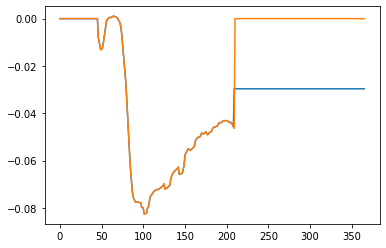

In [73]:
pl.plot(cov_ex[:,3,134])
pl.plot(covid_merge2[:,3,134])

i=np.argwhere(cov_ex[100,3,:]==0)
print (len(i))
i=np.argwhere(cov_ex[100,3,:]!=0)
print (len(i))

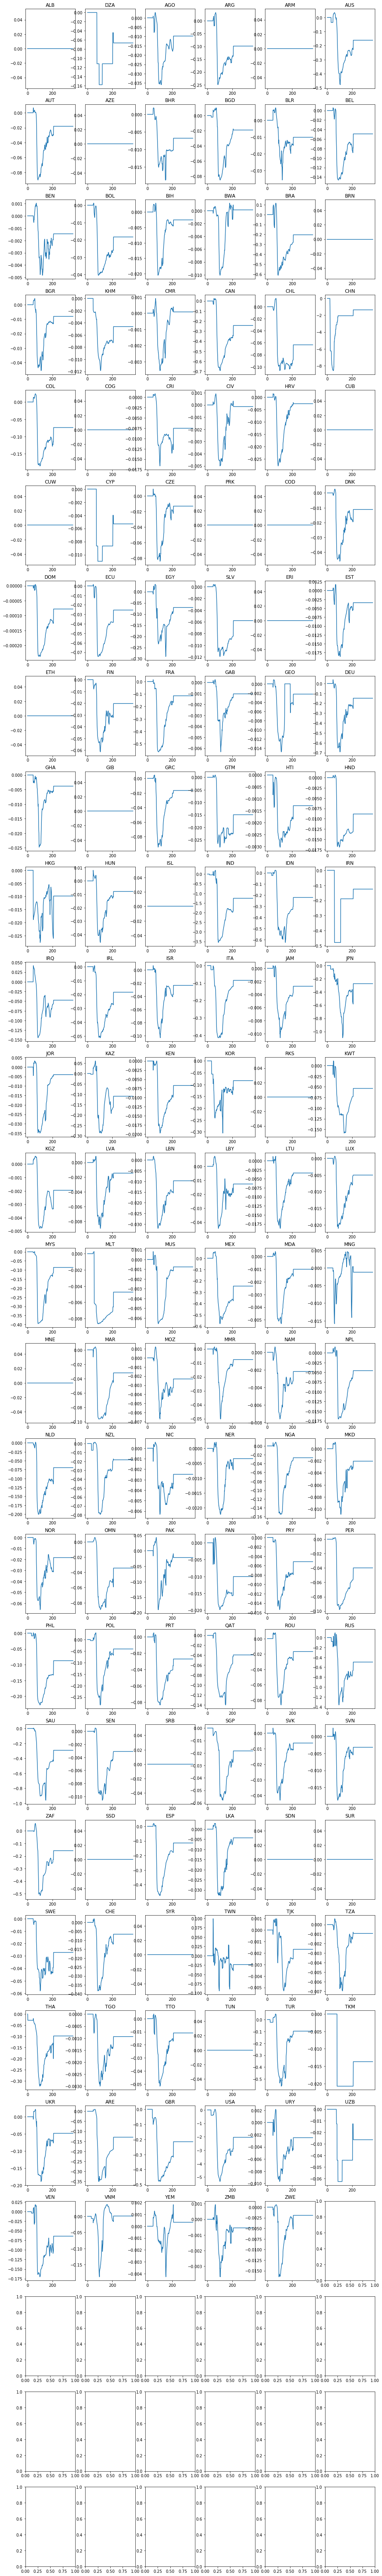

In [74]:
ix=0
iy=0
fig, ax = pl.subplots(27,6, figsize=(40/2.54, 300/2.54))
for i in range(143):
    ax[ix,iy].plot(cov_ex[:,:,i].sum(axis=1))
    ax[ix,iy].set_title(cor['country code'][i])
    iy=iy+1
    if iy==6:
        iy=0
        ix=ix+1

In [75]:
cor

,Row,country code,Index scale
0,1,ALB,Albania
1,2,DZA,Algeria
2,3,AGO,Angola
3,4,ARG,Argentina
4,5,ARM,Armenia
...,...,...,...
223,224,cn63,Qinghai
224,225,cn64,Ningxia
225,226,cn65,Xinjiang
226,227,ciavi,international aviation


In [76]:
np.argwhere(np.isnan(covid_merge2[150,2,:]))

array([], shape=(0, 1), dtype=int64)

In [77]:
c

142

(366, 8)
(366, 8)


Text(0, 0.5, 'Percent global total emissions (%)')

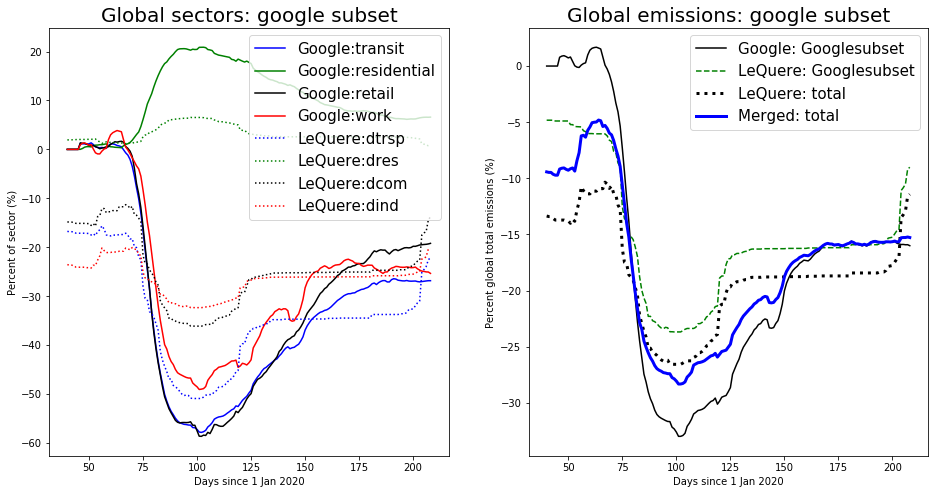

In [78]:
print (covid_g_glob.shape)
print (covid_e_glob.shape)
fig, ax = pl.subplots(1,2, figsize=(40/2.54, 20/2.54))

ax[0].plot(jday[40:end],cperg[40:end,0],color='blue',label='Google:transit')
ax[0].plot(jday[40:end],cperg[40:end,1],color='green',label='Google:residential')
ax[0].plot(jday[40:end],cperg[40:end,2],color='black',label='Google:retail')
ax[0].plot(jday[40:end],cperg[40:end,3],color='red',label='Google:work')
ax[0].plot(jday[40:end],cpere[40:end,0],color='blue',linestyle=':',label='LeQuere:dtrsp')
ax[0].plot(jday[40:end],cpere[40:end,1],color='green',linestyle=':',label='LeQuere:dres')
ax[0].plot(jday[40:end],cpere[40:end,2],color='black',linestyle=':',label='LeQuere:dcom')
ax[0].plot(jday[40:end],cpere[40:end,3],color='red',linestyle=':',label='LeQuere:dind')
ax[0].legend(fontsize=15)
ax[0].set_xlabel('Days since 1 Jan 2020')
ax[0].set_ylabel('Percent of sector (%)')
ax[0].set_title('Global sectors: google subset',fontsize=20)
ax[1].plot(jday[40:end],100*covid_g_glob[40:end,:].sum(axis=1)/base_g_glob[40:end,:].sum(axis=1),color='black',label='Google: Googlesubset')
ax[1].plot(jday[40:end],100*covid_e[40:end,:,idy].sum(axis=1).sum(axis=1)/base_e_glob[40:end,:].sum(axis=1),color='green',linestyle='--',label='LeQuere: Googlesubset')
ax[1].plot(jday[40:end],100*covid_e_glob[40:end,:].sum(axis=1)/base_e_glob[40:end,:].sum(axis=1),color='black',linewidth=3,linestyle=':',label='LeQuere: total')
ax[1].plot(jday[40:end],100*covid_merge[40:end,:,:].sum(axis=1).sum(axis=1)/base_e[40:end,:,:].sum(axis=1).sum(axis=1),color='blue',linewidth=3,linestyle='-',label='Merged: total')

ax[1].set_title('Global emissions: google subset',fontsize=20)
ax[1].legend(fontsize=15)
ax[1].set_xlabel('Days since 1 Jan 2020')
ax[1].set_ylabel('Percent global total emissions (%)')
#covid_g_glob[40:105,2]

In [79]:
type(covid_g)



numpy.ndarray

In [80]:
import sys
sys.path.append('/Users/earpmf/PYTHON/data/')
print (sys.path)

['/Users/earpmf/OneDrive - University of Leeds/PYTHON/Corinne', '/Users/earpmf/opt/anaconda3/lib/python37.zip', '/Users/earpmf/opt/anaconda3/lib/python3.7', '/Users/earpmf/opt/anaconda3/lib/python3.7/lib-dynload', '', '/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages', '/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/aeosa', '/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/earpmf/.ipython', '/Users/earpmf/PYTHON/data/']


In [81]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as pl
import os
import urllib
import json

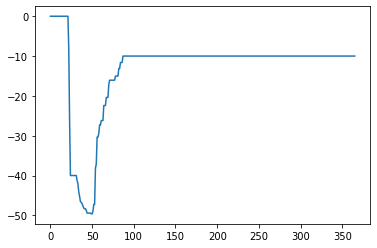

In [82]:

pl.plot(covid_e[:,2,23]/base_e[:,2,23]*100.0)
covid_us.shape
js=np.arange(366)+1
js =js.astype(str)
col=['code','region','sector','baseco2']+js.tolist()
cdf=pd.DataFrame(columns=col)
cdf['code']=cor['country code']
cdf['region']=cor['country code']